# 1.Organizar Ambiente

In [1]:
pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.3/240.3 kB 18.5 MB/s eta 0:00:00


In [2]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split

#datos
import statsmodels.api as sm

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from scipy import stats
import math

#Escalar Variables
from sklearn.preprocessing import MinMaxScaler

#creación de modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#import statsmodels.api as sm
import math

#Evaluacion de modelo
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#Factor de Inflación de la Varianza VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')



# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# APIS Datos
from datetime import datetime, timedelta
import re
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import csv

In [3]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
import math

#Separar los datos entrenamiento y prueba
from sklearn.model_selection import train_test_split


#Escalar Variables
from sklearn.preprocessing import MinMaxScaler


#Evaluación del modelo
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


#Creación de modelo
from sklearn.linear_model import LogisticRegression


# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Función para graficar un plot con multiples gráficas del mismo tipo:
#
# df       : dataframe
# cols     : lista de columnas a graficar
# num_cols : número de columnas
# num_rows : número de filas
# tipo     : 'c' = countplot,   'b' = boxplot, 's' = scatterplot
# targetVar: nombre de la variable comparativa de salida. Debe ser numérica y debe estar cotenida en el dataframe.
#            Para countplot no es necesario (None)
# figsize  : tamaño del plot. Valor por defecto (16,8)
#
# *Nota: el número de filas * el número de columnas debe ser mayor al total de elementos de cols
#


def plot_multiples_graficas(df, cols, num_cols, num_rows, tipo, targetVar, figsize=(16,8)):

    plt.rcParams['figure.figsize'] = figsize

    #num_plots = len(cols)
    #num_cols = math.ceil(np.sqrt(num_plots))
    #num_rows = math.ceil(num_plots/num_cols)

    fig, axs = plt.subplots(num_rows, num_cols)

    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols

        if num_rows == 1:
            if num_cols == 1:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs, dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs)
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs)
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[j])
        else:
            if num_cols == 1:
                if tipo == 'c':
                    sns.countplot(x=d[col], ax=axs[i], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i])
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[i, j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i, j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i, j])

# 2.Conseguir Datos spotify

In [5]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="Dashboard_ID",
                                                           client_secret="Cliente_Secreto_Dashboard"))

In [6]:
def spottotal200(playlist_id,categoria):
    # Crear una lista para almacenar los resultados de cada canción
    playlist_data = []
    ini = 0

    playlist = sp.playlist(playlist_id)
    num_items = playlist['tracks']['total']
    nombre_playlist = playlist['name']



    while ini <= 199 :

        playlist = sp.playlist_tracks(playlist_id, offset=ini)

        for track in playlist['items']:
            # Obtener información de la canción
            song = track['track']


            # Obtener los datos del artista y del álbum del primer resultado de la búsqueda

            selected_audio_features = {}

            selected_audio_features['Cancion'] = song['name']
            selected_audio_features['Artista'] = song['artists'][0]['name']


            # Obtener información del álbum
            album_info = song['album']

            selected_audio_features['categoria'] = categoria

            # Obtener las características de audio de la canción
            track_audio_features = sp.audio_features(song['id'])


            feature = track_audio_features[0]

            if feature is not None:
                selected_audio_features['acousticness'] = feature['acousticness']
                selected_audio_features['danceability'] = feature['danceability']
                selected_audio_features['duration_ms'] = feature['duration_ms']
                selected_audio_features['energy'] = feature['energy']
                selected_audio_features['instrumentalness'] = feature['instrumentalness']
                selected_audio_features['key'] = feature['key']
                selected_audio_features['liveness'] = feature['liveness']
                selected_audio_features['loudness'] = feature['loudness']
                selected_audio_features['mode'] = feature['mode']
                selected_audio_features['speechiness'] = feature['speechiness']
                selected_audio_features['tempo'] = feature['tempo']
                selected_audio_features['time_signature'] = feature['time_signature']
                selected_audio_features['valence'] = feature['valence']

                playlist_data.append(selected_audio_features)

        ini = ini + 100

    # Crear un DataFrame a partir de los resultados
    df = pd.DataFrame(playlist_data)

    with open('lista_playlist.csv', mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([nombre_playlist, categoria,playlist_id])


    print("Información de la playlist almacenada correctamente.")

    return df




In [ ]:
playlist_id = 'https://open.spotify.com/playlist/1iPDzUkWw8dF1g1rbEKgZf?si=cbf6d0a10ed247da'
cat = 'Indie'
playlist_df = spottotal200(playlist_id, cat )
nombrecsv = cat + '.csv'
print(nombrecsv)
playlist_df.to_csv(nombrecsv, index=False)


Sigue tu Camino.csv


# 3.Analisis Muestras 20 Generos

## 3.1 Analisis datos

In [ ]:
file_names = ['EDM.csv','HIP-HOP.csv','Indie.csv','R&B.csv',
              'Ranchenato.csv','Salsa.csv','blues.csv','clasica.csv',
              'country.csv','funk.csv','jazz.csv','pop.csv',
              'pop_latino.csv','reggae_roots.csv','reggaeton.csv','rock_español.csv',
              'rock_ingles.csv','ska.csv','soul.csv','Funk_br.csv'
              ]
dataframes = []
for file in file_names:
    df = pd.read_csv(file)
    dataframes.append(df)

gen_ml = pd.concat(dataframes)

gen_ml.describe()


acousticness  danceability   duration_ms       energy  \
count   3923.000000   3923.000000  3.923000e+03  3923.000000   
mean       0.298477      0.631773  2.448256e+05     0.618526   
std        0.291037      0.164866  9.491933e+04     0.225361   
min        0.000004      0.000000  2.337300e+04     0.000271   
25%        0.046200      0.541000  1.918270e+05     0.476000   
50%        0.197000      0.651000  2.286530e+05     0.650000   
75%        0.497000      0.748000  2.780335e+05     0.800000   
max        0.996000      0.979000  1.768080e+06     0.999000   

       instrumentalness          key     liveness     loudness         mode  \
count       3923.000000  3923.000000  3923.000000  3923.000000  3923.000000   
mean           0.132371     5.358909     0.184562    -8.325708     0.632934   
std            0.284712     3.595448     0.162427     5.207647     0.482066   
min            0.000000     0.000000     0.014800   -43.738000     0.000000   
25%            0.000000     2.000000     0.090100    -9.936000     0.000000   
50%            0.000025     6.000000     0.120000    -6.887000     1.000000   
75%            0.017600     9.000000     0.227000    -4.932500     1.000000   
max            0.980000    11.000000     0.994000     2.150000     1.000000   

       speechiness        tempo  time_signature      valence  
count  3923.000000  3923.000000     3923.000000  3923.000000  
mean      0.086874   121.850219        3.932959     0.575205  
std       0.085502    31.332728        0.339244     0.245578  
min       0.000000     0.000000        0.000000     0.000000  
25%       0.037500    95.144500        4.000000     0.395000  
50%       0.050500   119.995000        4.000000     0.598000  
75%       0.094150   142.836000        4.000000     0.775000  
max       0.680000   218.655000        5.000000     0.982000

In [ ]:
gen_ml.info(
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3923 entries, 0 to 174
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cancion           3923 non-null   object 
 1   Artista           3923 non-null   object 
 2   categoria         3923 non-null   object 
 3   acousticness      3923 non-null   float64
 4   danceability      3923 non-null   float64
 5   duration_ms       3923 non-null   int64  
 6   energy            3923 non-null   float64
 7   instrumentalness  3923 non-null   float64
 8   key               3923 non-null   int64  
 9   liveness          3923 non-null   float64
 10  loudness          3923 non-null   float64
 11  mode              3923 non-null   int64  
 12  speechiness       3923 non-null   float64
 13  tempo             3923 non-null   float64
 14  time_signature    3923 non-null   int64  
 15  valence           3923 non-null   float64
dtypes: float64(9), int64(4), object(3)
memory u

In [ ]:
gen_df = gen_ml.drop(columns=['Cancion','Artista'])

## 3.2 Visualización de datos

### Variables de entrada

In [ ]:
gen_df = gen_df.astype({'key': 'category', 'mode': 'category', 'time_signature':'category'})

In [ ]:
#Lista de variables categóricas
catCols = gen_df.select_dtypes(include = ["object", 'category']).columns.tolist()

gen_df[catCols].head()

categoria key mode time_signature
0       EDM  11    0              4
1       EDM   0    0              4
2       EDM   9    1              4
3       EDM   8    1              4
4       EDM   0    0              4

In [ ]:
#eliminar variable respuesta
catCols.remove('categoria')

In [ ]:
#Lista de variables numéricas

numCols=gen_df.select_dtypes(include = ['float64','float64','int32','int64']).columns.tolist()

gen_df[numCols].head()

acousticness  danceability  duration_ms  energy  instrumentalness  \
0        0.0498         0.617       247160   0.635          0.000014   
1        0.1970         0.633       193511   0.592          0.000000   
2        0.0280         0.501       225200   0.648          0.000013   
3        0.0037         0.586       235893   0.756          0.000395   
4        0.0475         0.565       215053   0.889          0.000000   

   liveness  loudness  speechiness    tempo  valence  
0     0.164    -6.769       0.0317  103.019    0.446  
1     0.099    -7.245       0.1120   90.066    0.679  
2     0.153    -7.173       0.0696  163.834    0.191  
3     0.134    -4.408       0.0380  122.011    0.277  
4     0.375    -2.841       0.0783   93.091    0.585

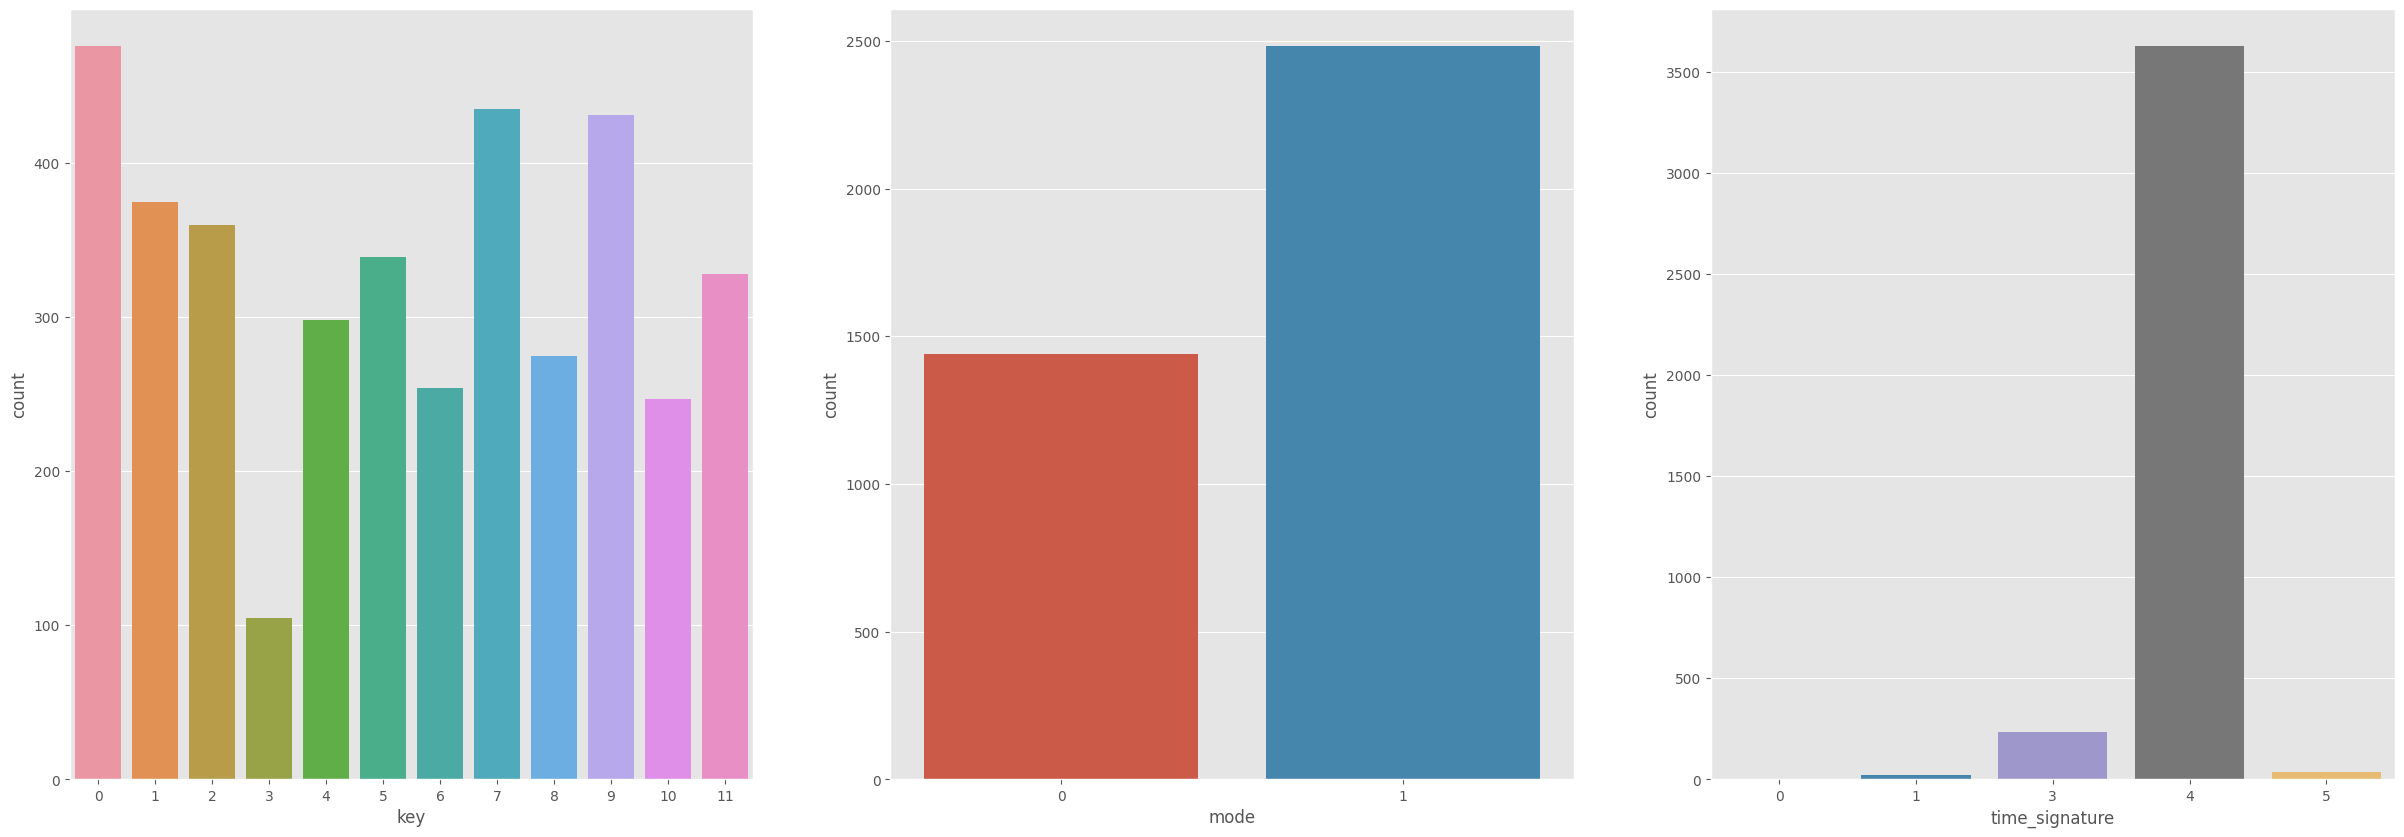

In [ ]:
#Visualización de frecuencia de instancias para variables categóricas
plot_multiples_graficas(gen_df,catCols, 3, 1, 'c', None, (30,10))

In [ ]:
# Distribución de cada variable categórica en el conjunto de datos

for col in catCols:
    print("="*5 + f" {col} " + "="*20)
    print(gen_df[col].value_counts())
    print()

===== key ====================
0     476
7     435
9     431
1     375
2     360
5     339
11    328
4     298
8     275
6     254
10    247
3     105
Name: key, dtype: int64

===== mode ====================
1    2483
0    1440
Name: mode, dtype: int64

===== time_signature ====================
4    3629
3     236
5      37
1      20
0       1
Name: time_signature, dtype: int64



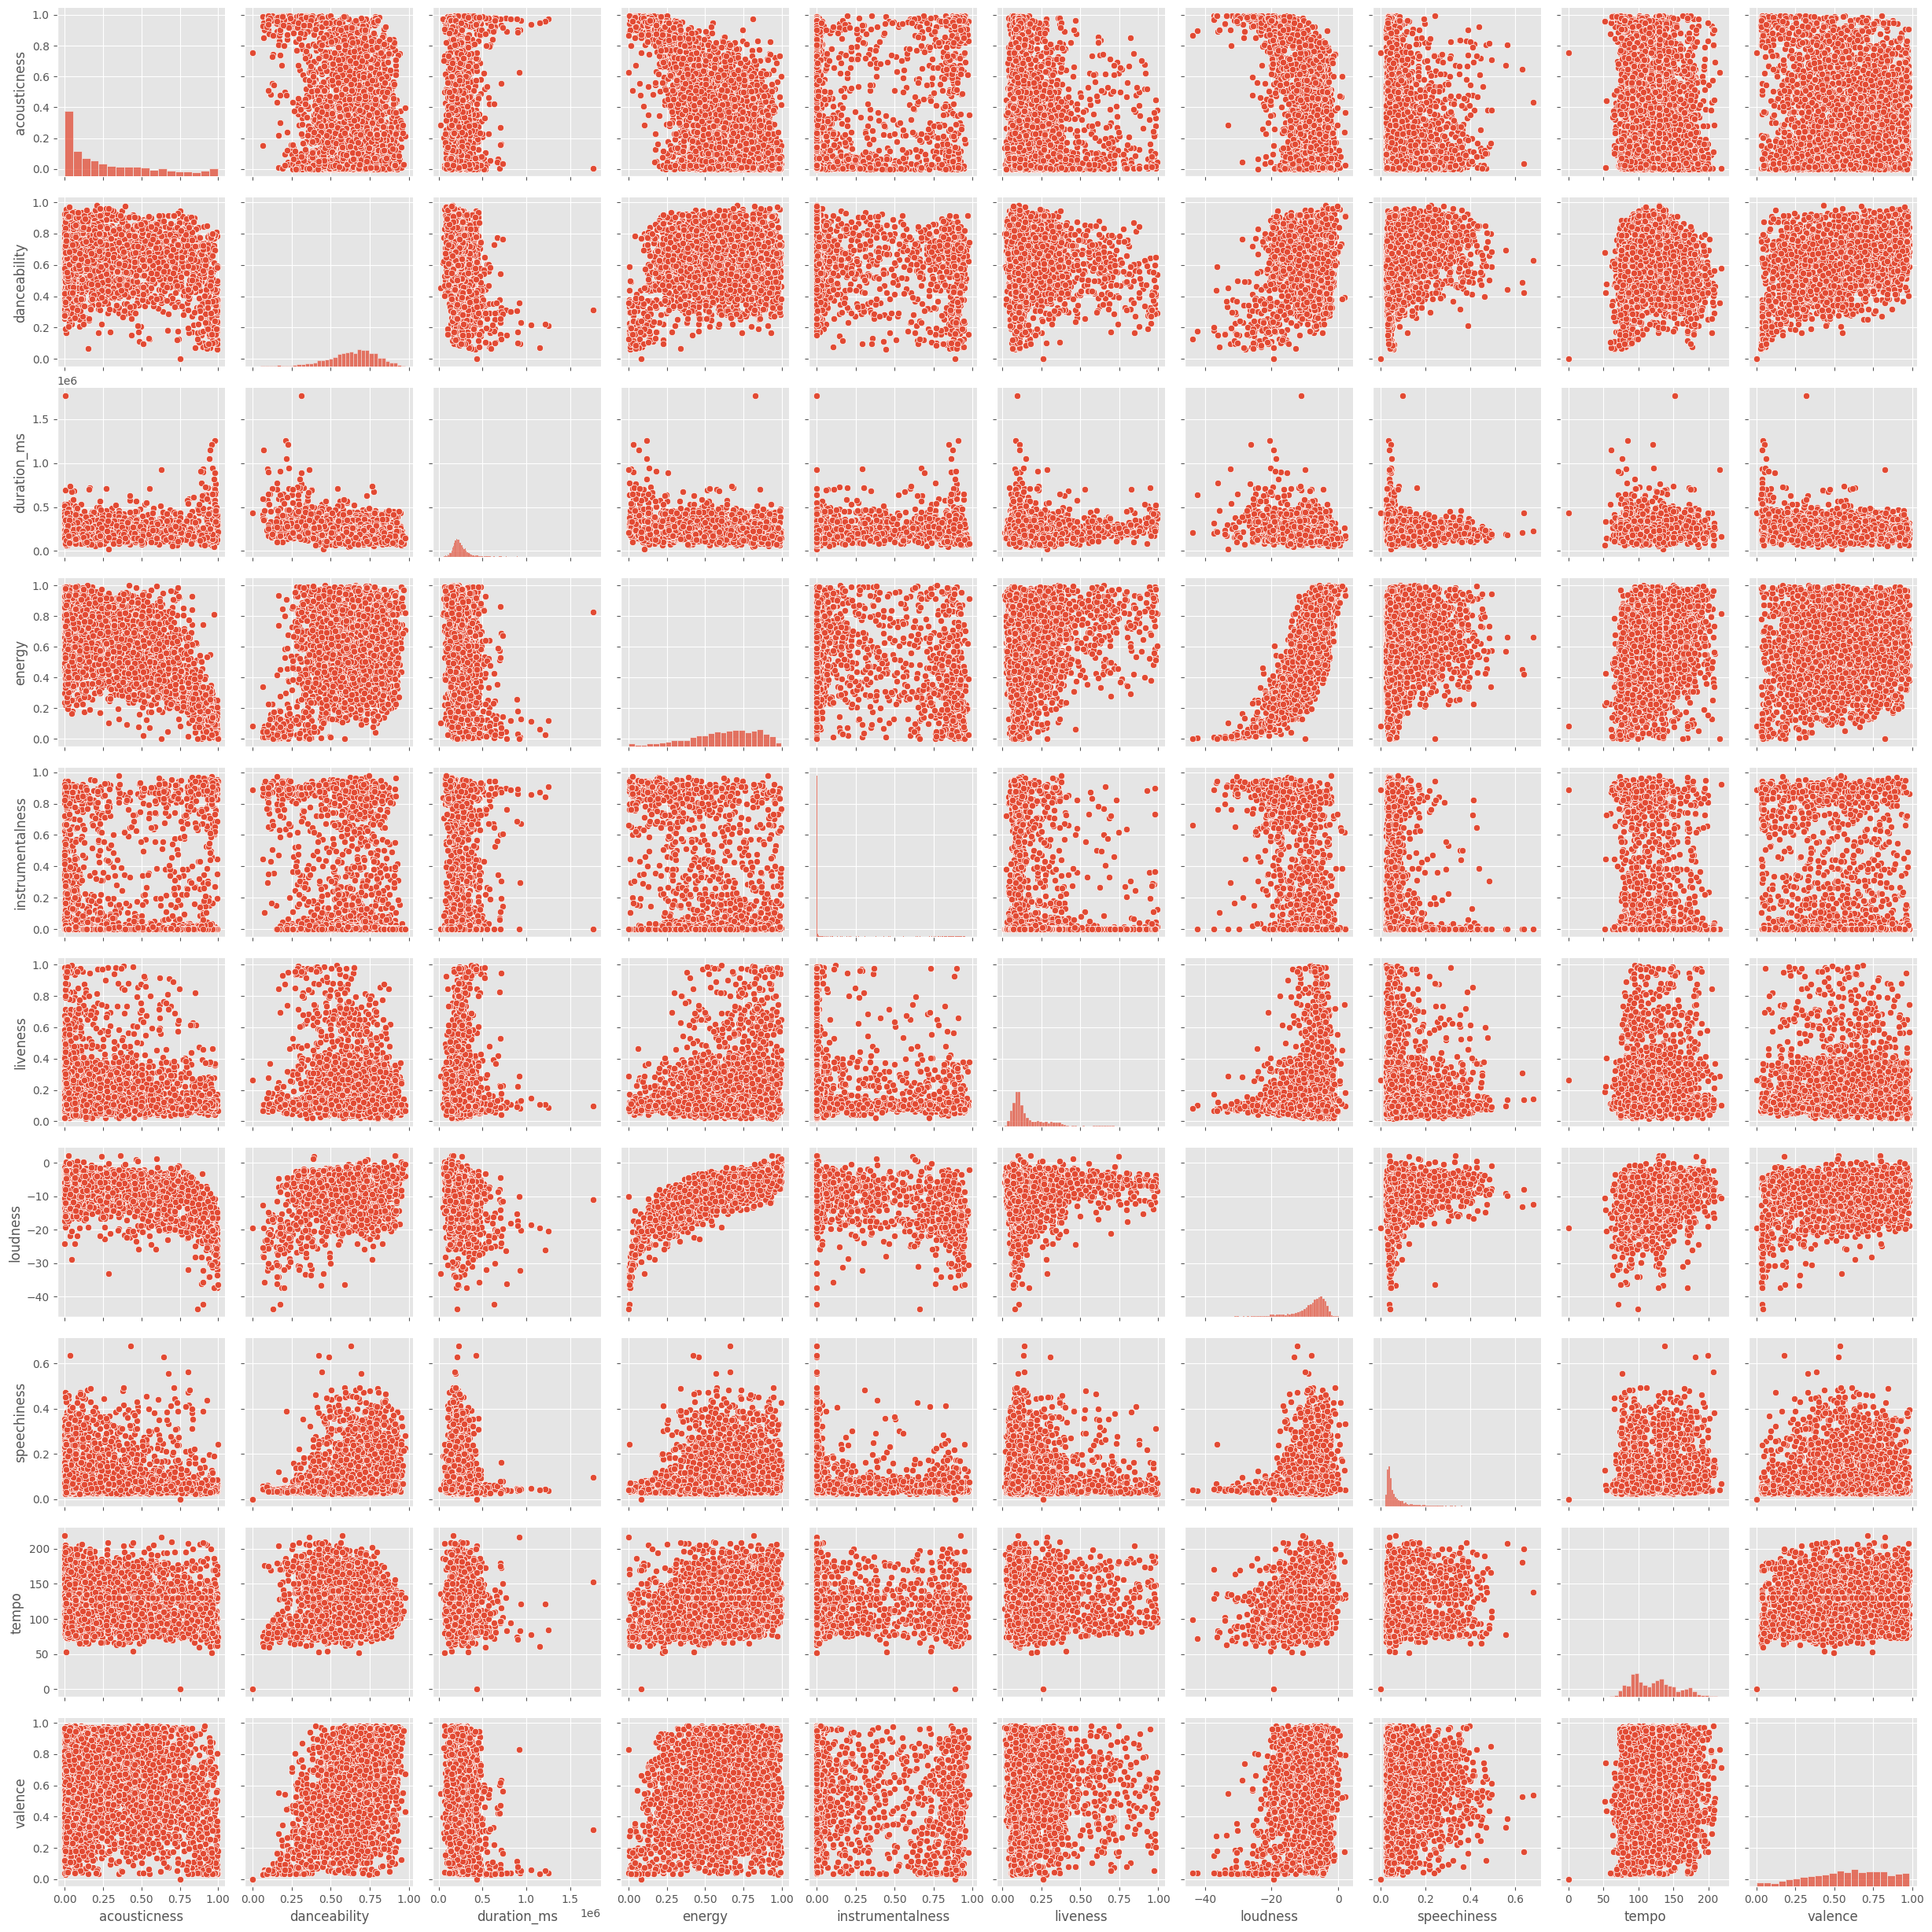

In [ ]:
#Visualización de variables numéricas

sns.pairplot(gen_df[numCols])

### Variable de salida

In [ ]:
# Distriución de la variable de salida

gen_df.groupby('categoria').categoria.count().sort_values(ascending=False)

categoria
EDM             200
jazz            200
ska             200
rock_ingles     200
rock_español    200
reggaeton       200
reggae_roots    200
pop_latino      200
pop             200
funk            200
country         200
blues           200
Ranchenato      200
R&B             200
Indie           200
HIP-HOP         200
soul            200
Salsa           196
Funk_br         175
clasica         152
Name: categoria, dtype: int64

In [ ]:
#Se establece las variables de entrada 'X' y la variable de salida 'y'
X = gen_df.drop(columns ='categoria')
y = gen_df['categoria']

##3.3 Preparación de datos

#### Creación de variables Dummies

In [ ]:
# Aplicación de la función de usuario Dummies: one-hot encoding

X =pd.get_dummies(X, drop_first=1)

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3923 entries, 0 to 174
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      3923 non-null   float64
 1   danceability      3923 non-null   float64
 2   duration_ms       3923 non-null   int64  
 3   energy            3923 non-null   float64
 4   instrumentalness  3923 non-null   float64
 5   liveness          3923 non-null   float64
 6   loudness          3923 non-null   float64
 7   speechiness       3923 non-null   float64
 8   tempo             3923 non-null   float64
 9   valence           3923 non-null   float64
 10  key_1             3923 non-null   uint8  
 11  key_2             3923 non-null   uint8  
 12  key_3             3923 non-null   uint8  
 13  key_4             3923 non-null   uint8  
 14  key_5             3923 non-null   uint8  
 15  key_6             3923 non-null   uint8  
 16  key_7             3923 non-null   uint8  
 

#### Dividir el conjunto de datos

In [ ]:
# Se crean los datasets de entrenamiento y prueba para las variables de entrada y salida

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 123,
                                        shuffle      = True
                                    )

#### Escalar Variables

In [ ]:
#Se establecen las variables numéricas a escalar

#Num_vars se le asigna la lista con las variables numerivas para posteriormente escalarlas
num_vars = numCols

print(num_vars)

['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']


In [ ]:
#Escalar Variables númericas

pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

X_train[num_vars].head()

acousticness  danceability  duration_ms  energy  instrumentalness  \
187        0.1386        0.7646       0.1249  0.6095            0.0000   
191        0.0392        0.4964       0.0715  0.7016            0.0000   
174        0.6536        0.3889       0.2171  0.2791            0.0615   
165        0.2108        0.7564       0.1259  0.7457            0.0138   
46         0.6074        0.8106       0.0718  0.5174            0.0000   

     liveness  loudness  speechiness  tempo  valence  
187    0.0921    0.8029       0.0510 0.5544   0.5652  
191    0.0847    0.8724       0.0424 0.7017   0.6242  
174    0.0689    0.6968       0.0628 0.6952   0.1415  
165    0.1146    0.8101       0.0393 0.5049   0.9664  
46     0.0842    0.7699       0.0775 0.5771   0.7831

## 3.4 Creación del modelo Random forest

#### Grid Search basado en validación cruzada

In [ ]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [150],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20],
              'criterion'   : ['gini', 'entropy']
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = - 1,
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

param_criterion param_max_depth param_max_features param_n_estimators  \
0             gini            None                  5                150   
10            gini              20                  7                150   
1             gini            None                  7                150   
9             gini              20                  5                150   

    mean_test_score  std_test_score  mean_train_score  std_train_score  
0            0.5542          0.0138            0.9959           0.0007  
10           0.5520          0.0145            0.9959           0.0007  
1            0.5519          0.0078            0.9959           0.0007  
9            0.5465          0.0127            0.9959           0.0007

In [ ]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 150} : 0.554176190331068 accuracy


In [ ]:
modelo_final = grid.best_estimator_

In [ ]:
modelo_final

RandomForestClassifier(max_features=5, n_estimators=150, random_state=123)

In [ ]:
# Error de test del modelo final
# ==============================================================================
y_pred = modelo_final.predict(X_test)

##### Evaluación del modelo

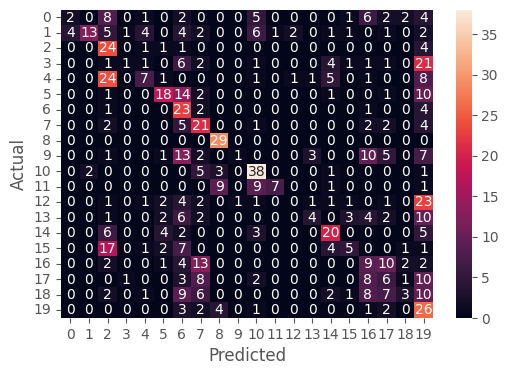

              precision    recall  f1-score   support

         EDM       0.33      0.06      0.10        33
     Funk_br       0.87      0.28      0.42        47
     HIP-HOP       0.25      0.77      0.38        31
       Indie       0.33      0.03      0.05        40
         R&B       0.41      0.14      0.21        49
  Ranchenato       0.56      0.38      0.46        47
       Salsa       0.22      0.74      0.34        31
       blues       0.30      0.57      0.40        37
     clasica       0.64      1.00      0.78        29
     country       0.50      0.02      0.04        43
        funk       0.56      0.76      0.64        50
        jazz       0.88      0.26      0.40        27
         pop       0.00      0.00      0.00        39
  pop_latino       0.44      0.12      0.19        34
reggae_roots       0.50      0.50      0.50        40
   reggaeton       0.38      0.13      0.20        38
rock_español       0.18      0.21      0.19        43
 rock_ingles       0.15    

In [ ]:
# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test, y_pred))

#### Importancia de predictores

##### Importancia por pureza de nodos

In [ ]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': modelo_final.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


predictor  importancia
2        duration_ms       0.1083
6           loudness       0.0983
1       danceability       0.0971
0       acousticness       0.0969
3             energy       0.0931
9            valence       0.0914
7        speechiness       0.0908
4   instrumentalness       0.0874
8              tempo       0.0731
5           liveness       0.0629
21            mode_1       0.0156
16             key_7       0.0086
18             key_9       0.0083
10             key_1       0.0075
11             key_2       0.0075
20            key_11       0.0072
13             key_4       0.0071
15             key_6       0.0065
14             key_5       0.0065
17             key_8       0.0060
24  time_signature_4       0.0053
23  time_signature_3       0.0050
19            key_10       0.0045
12             key_3       0.0033
25  time_signature_5       0.0013
22  time_signature_1       0.0005

#### Predicción de probabilidades

In [ ]:
# Predicción de probabilidades
# ==============================================================================
predicciones = modelo_final.predict_proba(X = X_test)

# Crear un diccionario para mapear las etiquetas
etiquetas = {0: 'EDM', 1: 'Funk_br', 2: 'HIP-HOP', 3: 'Indie', 4:'R&B',
             5: 'Ranchenato', 6:'Salsa', 7:'blues', 8:'clasica',
             9: 'country', 10:'funk', 11:'jazz', 12:'pop',
             13:'pop_latino', 14:'reggae_roots', 15:'reggaeton', 16:'rock_español',
             17:'rock_ingles',18:'ska',19:'soul'}

# Clasificación empleando la clase de mayor probabilidad
# ==============================================================================
df_predicciones = pd.DataFrame(data=predicciones, columns= ['EDM','Funk_br','HIP-HOP','Indie', 'R&B',
                                                            'Ranchenato','Salsa','blues', 'clasica',
                                                            'country', 'funk', 'jazz', 'pop',
                                                            'pop_latino', 'reggae_roots', 'reggaeton', 'rock_español',
                                                            'rock_ingles','ska','soul'])

# Obtener la etiqueta de clasificación según la probabilidad mas alta
df_predicciones['clasificacion mas alta'] = np.argmax(df_predicciones.values, axis=1)

# Mapear las etiquetas utilizando la probabilidad mas alta
df_predicciones['clasificacion mas alta'] = df_predicciones['clasificacion mas alta'].map(etiquetas)

df_predicciones.head(20)

EDM  Funk_br  HIP-HOP  Indie    R&B  Ranchenato  Salsa  blues  clasica  \
0  0.0000   0.0333   0.0000 0.0067 0.0400      0.0067 0.0067 0.1867   0.0333   
1  0.0067   0.0067   0.5978 0.0000 0.1022      0.0267 0.0467 0.0067   0.0000   
2  0.0200   0.0000   0.0667 0.0000 0.0000      0.0067 0.0800 0.0200   0.0000   
3  0.0000   0.0067   0.0000 0.0000 0.0000      0.0000 0.0200 0.3000   0.0067   
4  0.0000   0.0000   0.0133 0.0133 0.0133      0.2800 0.3400 0.0067   0.0000   
5  0.0200   0.0000   0.0200 0.0200 0.0067      0.1333 0.0400 0.0333   0.0000   
6  0.0133   0.0800   0.0000 0.2667 0.0067      0.0200 0.0200 0.0733   0.0000   
7  0.0000   0.0000   0.0000 0.0133 0.0000      0.0000 0.0000 0.0133   0.9000   
8  0.0067   0.0200   0.0067 0.0067 0.0000      0.0000 0.0000 0.0400   0.0067   
9  0.0000   0.0000   0.0000 0.0333 0.0200      0.0333 0.0133 0.1400   0.0333   
10 0.0000   0.0000   0.0000 0.0533 0.0067      0.0867 0.1733 0.1333   0.0067   
11 0.0267   0.0000   0.0367 0.0067 0.0167      0.0333 0.0533 0.1533   0.0000   
12 0.0067   0.0333   0.0267 0.1000 0.0400      0.0733 0.0267 0.0333   0.0000   
13 0.0667   0.0400   0.3483 0.0000 0.0917      0.0067 0.0133 0.0133   0.0000   
14 0.0133   0.0067   0.0800 0.0133 0.0000      0.0467 0.0200 0.0400   0.0000   
15 0.0000   0.0000   0.0000 0.0600 0.0000      0.0133 0.0200 0.1200   0.0000   
16 0.0200   0.0200   0.4520 0.0000 0.0413      0.0200 0.0200 0.0000   0.0000   
17 0.0000   0.0200   0.0067 0.0422 0.0000      0.0333 0.0733 0.0533   0.0333   
18 0.0067   0.0067   0.0133 0.0067 0.0133      0.0200 0.0467 0.2800   0.0000   
19 0.0000   0.0000   0.0133 0.0000 0.0067      0.0533 0.5200 0.0400   0.0000   

    country  ...   jazz    pop  pop_latino  reggae_roots  reggaeton  \
0    0.0000  ... 0.0067 0.1133      0.0067        0.1400     0.0000   
1    0.0333  ... 0.0000 0.0133      0.0200        0.0333     0.0600   
2    0.0133  ... 0.0000 0.0000      0.0533        0.0333     0.4067   
3    0.0000  ... 0.0000 0.0000      0.0000        0.0133     0.0000   
4    0.0267  ... 0.0000 0.0000      0.1200        0.0133     0.0200   
5    0.0200  ... 0.0000 0.0133      0.1067        0.0067     0.0067   
6    0.0467  ... 0.0000 0.0933      0.0467        0.0333     0.0133   
7    0.0000  ... 0.0000 0.0000      0.0000        0.0000     0.0000   
8    0.0000  ... 0.0000 0.0000      0.0067        0.0933     0.0000   
9    0.0067  ... 0.0000 0.0600      0.0267        0.0133     0.0000   
10   0.0400  ... 0.0000 0.0000      0.0133        0.0267     0.0000   
11   0.0800  ... 0.0000 0.0133      0.1387        0.0000     0.0133   
12   0.0000  ... 0.0067 0.1400      0.0200        0.0867     0.0067   
13   0.0000  ... 0.0000 0.0133      0.0067        0.0200     0.0800   
14   0.0667  ... 0.0067 0.0200      0.1067        0.0000     0.0000   
15   0.0000  ... 0.0467 0.0067      0.0067        0.0733     0.0000   
16   0.0000  ... 0.0000 0.0133      0.0267        0.0400     0.1400   
17   0.0467  ... 0.0000 0.0133      0.1333        0.0000     0.0000   
18   0.0733  ... 0.0000 0.0000      0.0533        0.0000     0.0200   
19   0.0333  ... 0.0000 0.0000      0.0867        0.0267     0.0333   

    rock_español  rock_ingles    ska   soul  clasificacion mas alta  
0         0.0133       0.0267 0.0267 0.0333                    funk  
1         0.0000       0.0000 0.0400 0.0067                 HIP-HOP  
2         0.0267       0.0333 0.1533 0.0600               reggaeton  
3         0.1133       0.3200 0.0333 0.0400             rock_ingles  
4         0.0400       0.0067 0.0533 0.0467                   Salsa  
5         0.2600       0.0867 0.0467 0.1600            rock_español  
6         0.0067       0.0667 0.1267 0.0333                   Indie  
7         0.0067       0.0067 0.0000 0.0200                 clasica  
8         0.0467       0.0200 0.0267 0.0800                    funk  
9         0.1200       0.0933 0.0400 0.3600                    soul  
10        0.0333       0.0600 0.0400 0.2867                    

# 4.Analisis Muestras 12 Generos

## 4.1 Analisis datos

In [ ]:
file_names = ['HIP-HOP.csv',
              'Ranchenato.csv','Salsa.csv','blues.csv','clasica.csv',
              'funk.csv','jazz.csv','pop_latino.csv',
              'reggae_roots.csv',
              'rock_ingles.csv','soul.csv','Funk_br.csv' ]
dataframes = []
for file in file_names:
    df = pd.read_csv(file)
    dataframes.append(df)

gen_ml = pd.concat(dataframes)

gen_ml.describe()


acousticness  danceability  duration_ms    energy  instrumentalness  \
count     2323.0000     2323.0000    2323.0000 2323.0000         2323.0000   
mean         0.3599        0.6163  261439.9716    0.5689            0.2061   
std          0.3138        0.1804  107663.5822    0.2404            0.3393   
min          0.0000        0.0000   23373.0000    0.0003            0.0000   
25%          0.0660        0.5200  197158.0000    0.4090            0.0000   
50%          0.2880        0.6450  248686.0000    0.5920            0.0002   
75%          0.6105        0.7450  300886.5000    0.7630            0.3295   
max          0.9960        0.9790 1252322.0000    0.9980            0.9800   

            key  liveness  loudness      mode  speechiness     tempo  \
count 2323.0000 2323.0000 2323.0000 2323.0000    2323.0000 2323.0000   
mean     5.3422    0.1780   -9.7916    0.6251       0.0840  120.0143   
std      3.5812    0.1634    6.0257    0.4842       0.0836   31.5095   
min      0.0000    0.0148  -43.7380    0.0000       0.0000    0.0000   
25%      2.0000    0.0870  -12.4175    0.0000       0.0374   93.9540   
50%      5.0000    0.1150   -8.0450    1.0000       0.0484  117.9890   
75%      9.0000    0.2135   -5.5630    1.0000       0.0870  140.4340   
max     11.0000    0.9940    2.1500    1.0000       0.5630  218.6550   

       time_signature   valence  
count       2323.0000 2323.0000  
mean           3.9070    0.5780  
std            0.3826    0.2610  
min            0.0000    0.0000  
25%            4.0000    0.3860  
50%            4.0000    0.6050  
75%            4.0000    0.7945  
max            5.0000    0.9820

In [ ]:
gen_ml.info(
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2323 entries, 0 to 174
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cancion           2323 non-null   object 
 1   Artista           2323 non-null   object 
 2   categoria         2323 non-null   object 
 3   acousticness      2323 non-null   float64
 4   danceability      2323 non-null   float64
 5   duration_ms       2323 non-null   int64  
 6   energy            2323 non-null   float64
 7   instrumentalness  2323 non-null   float64
 8   key               2323 non-null   int64  
 9   liveness          2323 non-null   float64
 10  loudness          2323 non-null   float64
 11  mode              2323 non-null   int64  
 12  speechiness       2323 non-null   float64
 13  tempo             2323 non-null   float64
 14  time_signature    2323 non-null   int64  
 15  valence           2323 non-null   float64
dtypes: float64(9), int64(4), object(3)
memory u

In [ ]:
gen_df = gen_ml.drop(columns=['Cancion','Artista'])

## 4.2 Visualización de datos

### Variables de entrada

In [ ]:
gen_df = gen_df.astype({'key': 'category', 'mode': 'category', 'time_signature':'category'})

In [ ]:
#Lista de variables categóricas
catCols = gen_df.select_dtypes(include = ["object", 'category']).columns.tolist()

gen_df[catCols].head()

categoria key mode time_signature
0   HIP-HOP  11    0              4
1   HIP-HOP   6    0              4
2   HIP-HOP   9    0              4
3   HIP-HOP  11    0              4
4   HIP-HOP   2    1              4

In [ ]:
#eliminar variable respuesta
catCols.remove('categoria')

In [ ]:
#Lista de variables numéricas

numCols=gen_df.select_dtypes(include = ['float64','float64','int32','int64']).columns.tolist()

gen_df[numCols].head()

acousticness  danceability  duration_ms  energy  instrumentalness  \
0        0.2990        0.8930       299147  0.7400            0.0000   
1        0.2550        0.8990       193467  0.7130            0.0000   
2        0.0658        0.9080       297933  0.7620            0.0000   
3        0.2770        0.6630       270507  0.7770            0.0000   
4        0.0097        0.7010       326467  0.7280            0.0011   

   liveness  loudness  speechiness    tempo  valence  
0    0.0881   -4.9360       0.1320 101.0250   0.9630  
1    0.0708   -2.7520       0.3660  90.0510   0.7770  
2    0.1040   -4.7730       0.1530 148.0160   0.8690  
3    0.0466   -4.9540       0.1090  92.6810   0.7580  
4    0.3610   -4.5540       0.2550 171.3880   0.0591

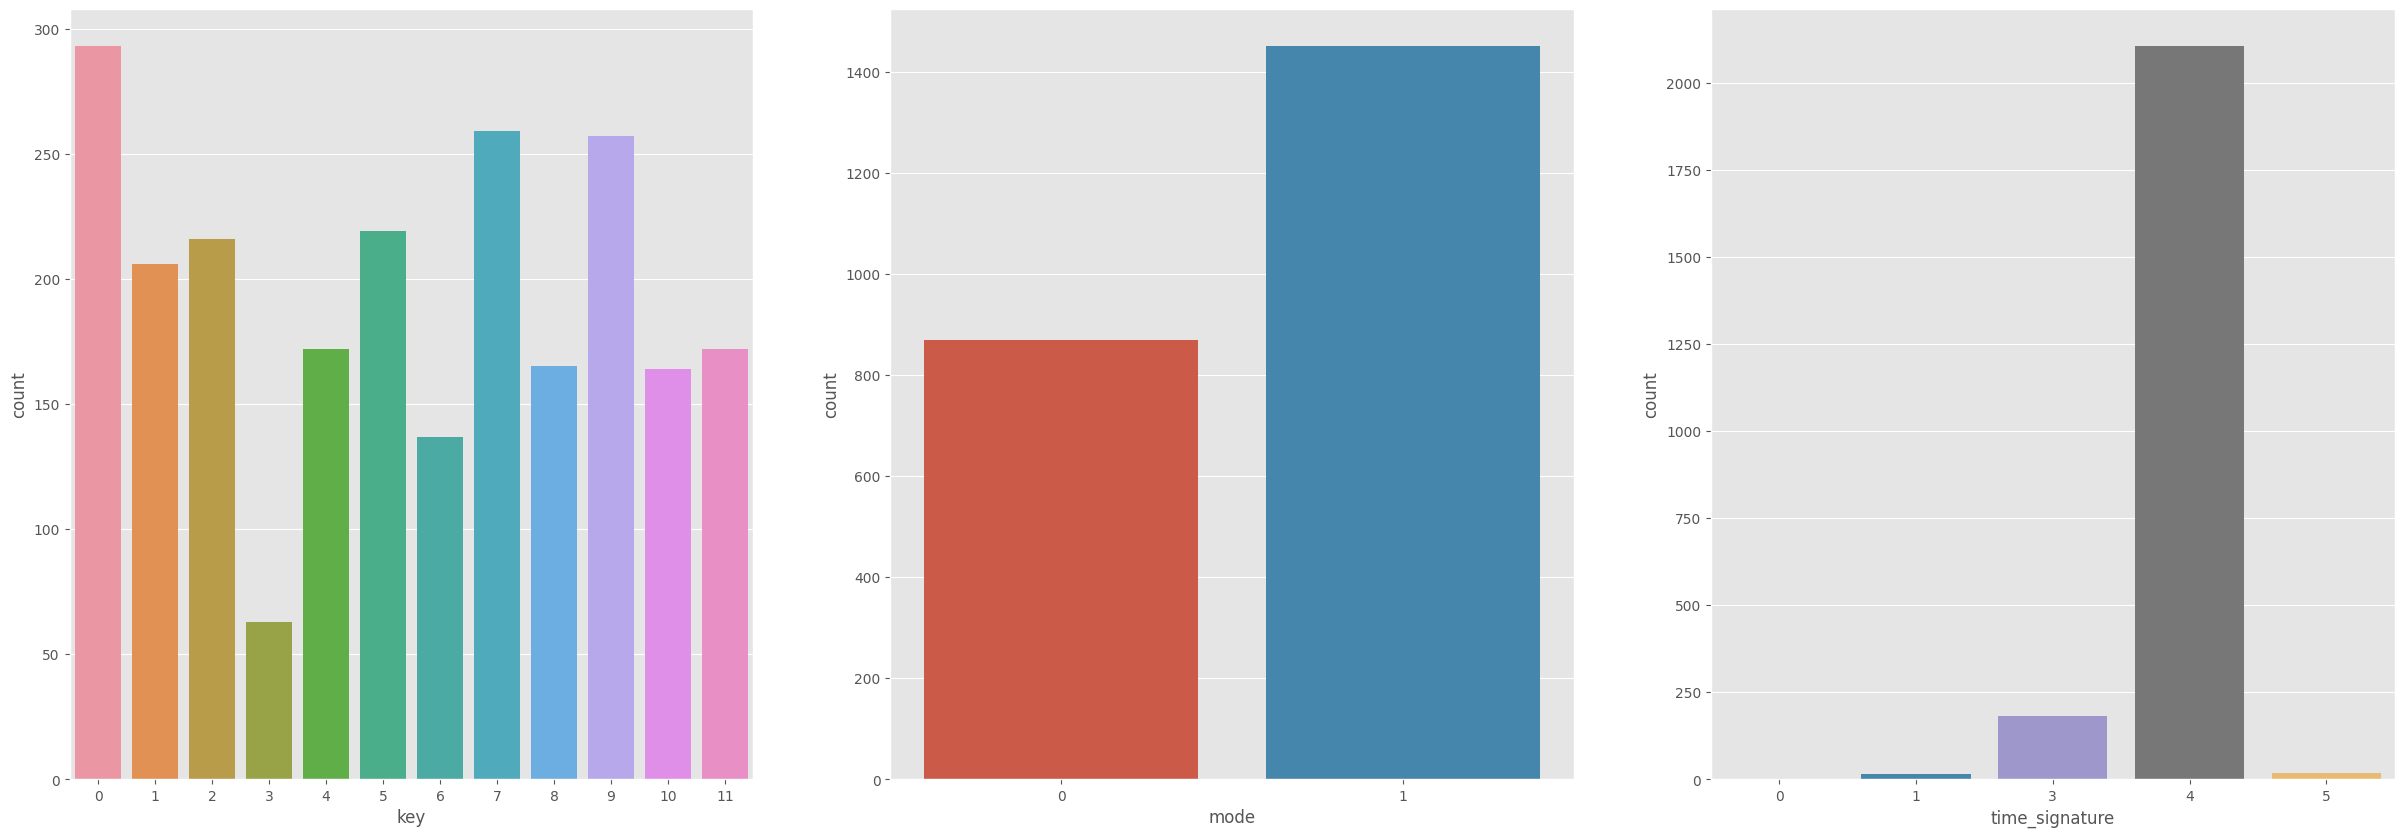

In [ ]:
#Visualización de frecuencia de instancias para variables categóricas
plot_multiples_graficas(gen_df,catCols, 3, 1, 'c', None, (30,10))

In [ ]:
# Distribución de cada variable categórica en el conjunto de datos

for col in catCols:
    print("="*5 + f" {col} " + "="*20)
    print(gen_df[col].value_counts())
    print()

===== key ====================
0     293
7     259
9     257
5     219
2     216
1     206
4     172
11    172
8     165
10    164
6     137
3      63
Name: key, dtype: int64

===== mode ====================
1    1452
0     871
Name: mode, dtype: int64

===== time_signature ====================
4    2106
3     182
5      18
1      16
0       1
Name: time_signature, dtype: int64



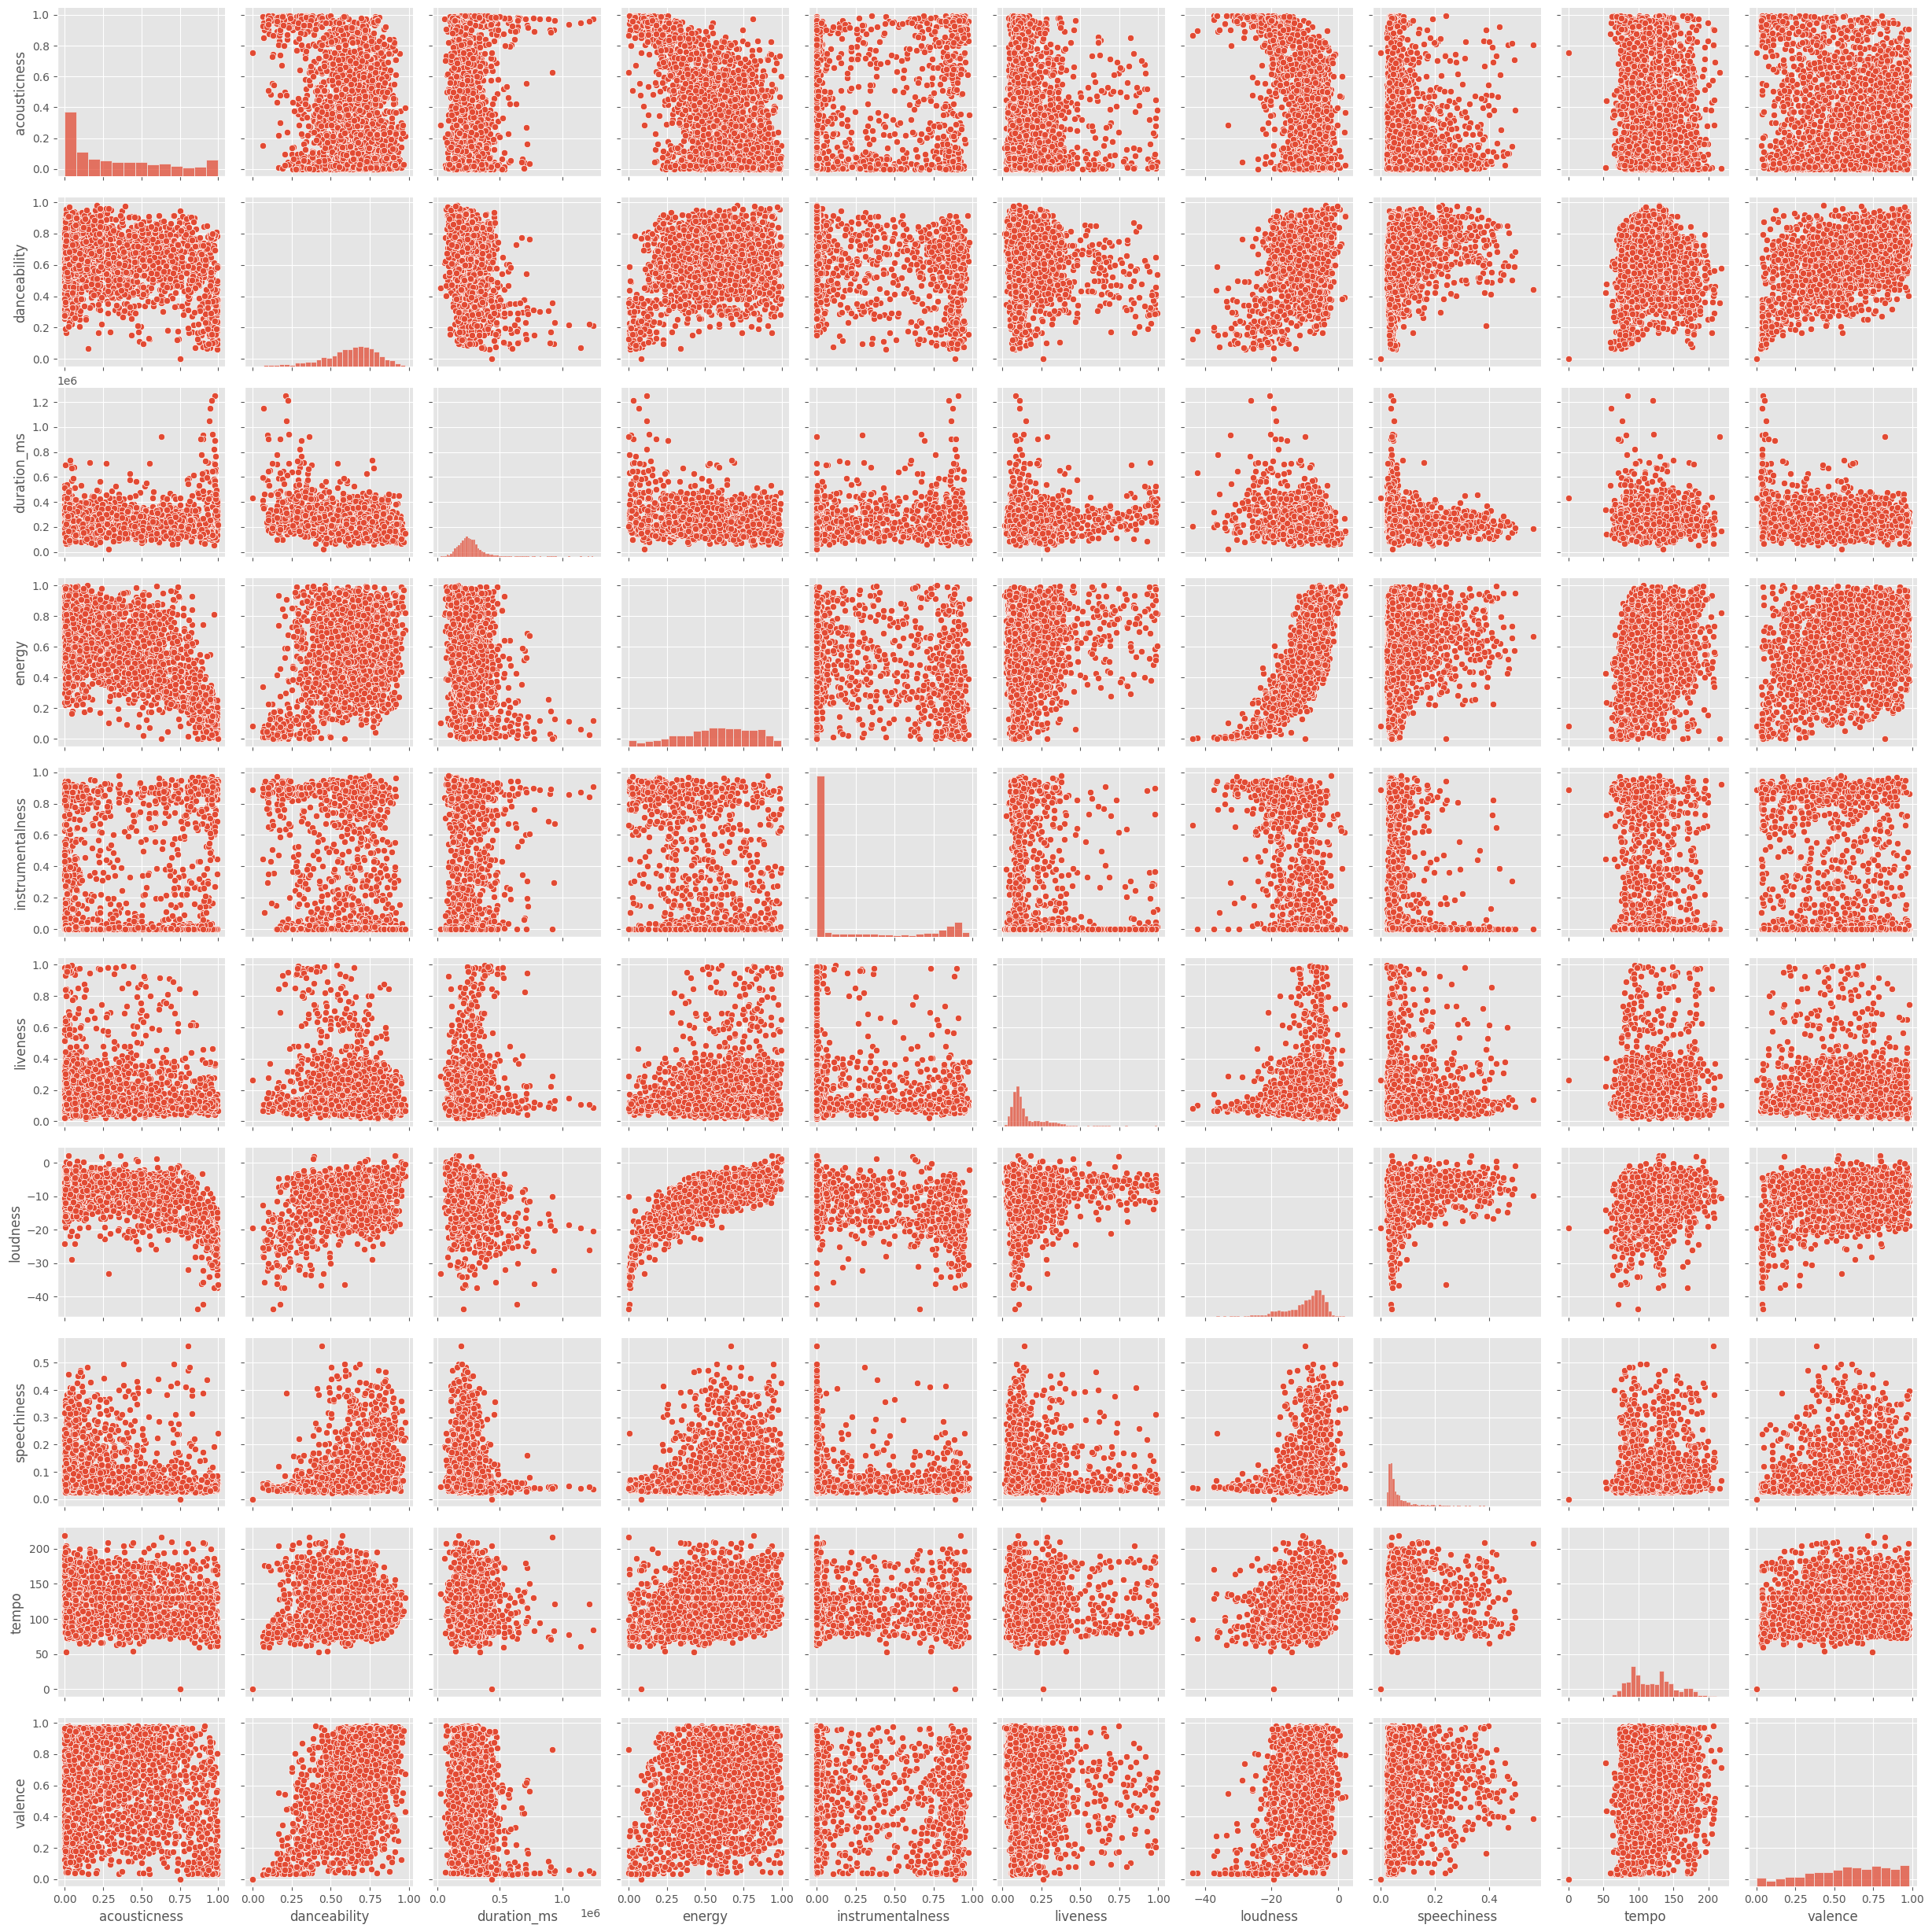

In [ ]:
#Visualización de variables numéricas

#sns.pairplot(gen_df[numCols])

### Variable de salida

In [ ]:
# Distriución de la variable de salida

gen_df.groupby('categoria').categoria.count().sort_values(ascending=False)

categoria
HIP-HOP         200
Ranchenato      200
blues           200
funk            200
jazz            200
pop_latino      200
reggae_roots    200
rock_ingles     200
soul            200
Salsa           196
Funk_br         175
clasica         152
Name: categoria, dtype: int64

In [ ]:
#Se establece las variables de entrada 'X' y la variable de salida 'y'
X = gen_df.drop(columns ='categoria')
y = gen_df['categoria']

##4.3 Preparación de datos

#### Creación de variables Dummies

In [ ]:
# Aplicación de la función de usuario Dummies: one-hot encoding

X =pd.get_dummies(X, drop_first=1)

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2323 entries, 0 to 174
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2323 non-null   float64
 1   danceability      2323 non-null   float64
 2   duration_ms       2323 non-null   int64  
 3   energy            2323 non-null   float64
 4   instrumentalness  2323 non-null   float64
 5   liveness          2323 non-null   float64
 6   loudness          2323 non-null   float64
 7   speechiness       2323 non-null   float64
 8   tempo             2323 non-null   float64
 9   valence           2323 non-null   float64
 10  key_1             2323 non-null   uint8  
 11  key_2             2323 non-null   uint8  
 12  key_3             2323 non-null   uint8  
 13  key_4             2323 non-null   uint8  
 14  key_5             2323 non-null   uint8  
 15  key_6             2323 non-null   uint8  
 16  key_7             2323 non-null   uint8  
 

#### Dividir el conjunto de datos

In [ ]:
# Se crean los datasets de entrenamiento y prueba para las variables de entrada y salida

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 123,
                                        shuffle      = True
                                    )

#### Escalar Variables

In [ ]:
#Se establecen las variables numéricas a escalar

#Num_vars se le asigna la lista con las variables numerivas para posteriormente escalarlas
num_vars = numCols

print(num_vars)

['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']


In [ ]:
#Escalar Variables númericas

pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

X_train[num_vars].head()

acousticness  danceability  duration_ms  energy  instrumentalness  \
36         0.5452        0.3739       0.1258  0.4492            0.0000   
21         0.1797        0.6333       0.0640  0.6150            0.0000   
168        0.4377        0.5730       0.2823  0.6351            0.6643   
50         0.4086        0.5618       0.0424  0.9538            0.1082   
94         0.1697        0.7211       0.1878  0.7075            0.9735   

     liveness  loudness  speechiness  tempo  valence  
36     0.1095    0.7843       0.0703 0.4101   0.2200  
21     0.1054    0.8005       0.2404 0.6034   0.4124  
168    0.0710    0.6719       0.1764 0.7135   0.1171  
50     0.2157    0.8646       0.3717 0.5344   0.5845  
94     0.3393    0.6632       0.0822 0.4686   0.4745

## 4.4 Creación del modelo Random forest

#### Grid Search basado en validación cruzada

In [ ]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [150],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20],
              'criterion'   : ['gini', 'entropy']
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = - 1,
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

param_criterion param_max_depth param_max_features param_n_estimators  \
0             gini            None                  5                150   
1             gini            None                  7                150   
9             gini              20                  5                150   
22         entropy              20                  7                150   

    mean_test_score  std_test_score  mean_train_score  std_train_score  
0            0.7320          0.0337            0.9991           0.0005  
1            0.7314          0.0311            0.9991           0.0005  
9            0.7303          0.0354            0.9991           0.0005  
22           0.7287          0.0258            0.9991           0.0005

In [ ]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 150} : 0.731956641451468 accuracy


In [ ]:
modelo_final = grid.best_estimator_

In [ ]:
modelo_final

RandomForestClassifier(max_features=5, n_estimators=150, random_state=123)

In [ ]:
# Error de test del modelo final
# ==============================================================================
y_pred = modelo_final.predict(X_test)

##### Evaluación del modelo

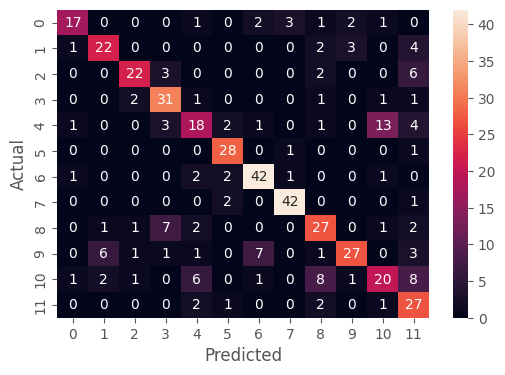

              precision    recall  f1-score   support

     Funk_br       0.81      0.63      0.71        27
     HIP-HOP       0.71      0.69      0.70        32
  Ranchenato       0.81      0.67      0.73        33
       Salsa       0.69      0.84      0.76        37
       blues       0.55      0.42      0.47        43
     clasica       0.80      0.93      0.86        30
        funk       0.79      0.86      0.82        49
        jazz       0.89      0.93      0.91        45
  pop_latino       0.60      0.66      0.63        41
reggae_roots       0.82      0.57      0.68        47
 rock_ingles       0.53      0.42      0.47        48
        soul       0.47      0.82      0.60        33

    accuracy                           0.69       465
   macro avg       0.71      0.70      0.69       465
weighted avg       0.70      0.69      0.69       465



In [ ]:
# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test, y_pred))

#### Importancia de predictores

##### Importancia por pureza de nodos

In [ ]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': modelo_final.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


predictor  importancia
2        duration_ms       0.1071
4   instrumentalness       0.1069
0       acousticness       0.1067
3             energy       0.0994
6           loudness       0.0992
1       danceability       0.0982
7        speechiness       0.0973
9            valence       0.0896
8              tempo       0.0626
5           liveness       0.0513
21            mode_1       0.0135
24  time_signature_4       0.0064
23  time_signature_3       0.0064
18             key_9       0.0062
11             key_2       0.0060
10             key_1       0.0057
16             key_7       0.0057
13             key_4       0.0055
17             key_8       0.0048
15             key_6       0.0046
14             key_5       0.0046
20            key_11       0.0044
19            key_10       0.0043
12             key_3       0.0020
25  time_signature_5       0.0008
22  time_signature_1       0.0006

#### Predicción de probabilidades

In [ ]:
# Predicción de probabilidades
# ==============================================================================
predicciones = modelo_final.predict_proba(X = X_test)

# Crear un diccionario para mapear las etiquetas
etiquetas = {0: 'Funk_br', 1: 'HIP-HOP', 2: 'Ranchenato', 3:'Salsa', 4:'blues', 5:'clasica',
             6:'funk', 7:'jazz', 8:'pop_latino', 9:'reggae_roots', 10:'rock_ingles',11:'soul'}

# Clasificación empleando la clase de mayor probabilidad
# ==============================================================================
df_predicciones = pd.DataFrame(data=predicciones, columns= ['Funk_br','HIP-HOP','Ranchenato','Salsa','blues', 'clasica',
                                                            'funk', 'jazz','pop_latino', 'reggae_roots','rock_ingles','soul'])

# Obtener la etiqueta de clasificación según la probabilidad mas alta
df_predicciones['clasificacion mas alta'] = np.argmax(df_predicciones.values, axis=1)

# Mapear las etiquetas utilizando la probabilidad mas alta
df_predicciones['clasificacion mas alta'] = df_predicciones['clasificacion mas alta'].map(etiquetas)

df_predicciones.head(20)

Funk_br  HIP-HOP  Ranchenato  Salsa  blues  clasica   funk   jazz  \
0    0.0000   0.0000      0.0000 0.0000 0.0267   0.7733 0.1067 0.0000   
1    0.0133   0.0267      0.0067 0.1267 0.4667   0.0000 0.0000 0.0000   
2    0.0467   0.0000      0.0000 0.0133 0.1600   0.0200 0.4667 0.0533   
3    0.1333   0.0000      0.0133 0.0133 0.0933   0.1067 0.1600 0.3200   
4    0.0200   0.0600      0.0133 0.0000 0.1276   0.0000 0.0000 0.0000   
5    0.0400   0.3267      0.0133 0.0533 0.0933   0.0000 0.0000 0.0000   
6    0.0000   0.0000      0.0333 0.0000 0.0533   0.0000 0.0133 0.0000   
7    0.1400   0.0200      0.0067 0.0800 0.1867   0.0067 0.2667 0.0133   
8    0.0133   0.0800      0.4067 0.1133 0.0267   0.0000 0.0000 0.0000   
9    0.0333   0.0000      0.0000 0.0000 0.0267   0.0400 0.7333 0.0533   
10   0.0000   0.0200      0.0000 0.0133 0.0733   0.0000 0.0400 0.0000   
11   0.0533   0.0000      0.0067 0.0000 0.1133   0.0200 0.5867 0.0400   
12   0.0000   0.0000      0.0800 0.2667 0.0800   0.0000 0.0267 0.0133   
13   0.0000   0.1200      0.3667 0.2600 0.0200   0.0000 0.0067 0.0000   
14   0.0133   0.0467      0.0733 0.0333 0.3200   0.0000 0.0267 0.0000   
15   0.0133   0.0000      0.0667 0.0200 0.1400   0.1467 0.1600 0.2000   
16   0.0200   0.0133      0.1933 0.0267 0.0467   0.0000 0.0133 0.0067   
17   0.0067   0.0000      0.0000 0.0000 0.0200   0.0200 0.5667 0.0467   
18   0.0133   0.0200      0.1133 0.0800 0.0933   0.0000 0.0333 0.0000   
19   0.0267   0.0000      0.0067 0.0067 0.0600   0.1533 0.2467 0.4067   

    pop_latino  reggae_roots  rock_ingles   soul clasificacion mas alta  
0       0.0000        0.0000       0.0067 0.0867                clasica  
1       0.1533        0.0067       0.1533 0.0467                  blues  
2       0.0133        0.0333       0.0867 0.1067                   funk  
3       0.0000        0.0000       0.1067 0.0533                   jazz  
4       0.0600        0.0333       0.6458 0.0400            rock_ingles  
5       0.0667        0.0600       0.3000 0.0467                HIP-HOP  
6       0.1800        0.0733       0.4133 0.2333            rock_ingles  
7       0.0200        0.0533       0.1400 0.0667                   funk  
8       0.1000        0.1200       0.0267 0.1133             Ranchenato  
9       0.0133        0.0400       0.0200 0.0400                   funk  
10      0.0400        0.0067       0.3733 0.4333                   soul  
11      0.0067        0.0600       0.0600 0.0533                   funk  
12      0.0667        0.0667       0.1200 0.2800                   soul  
13      0.1333        0.0467       0.0067 0.0400             Ranchenato  
14      0.1000        0.0333       0.2133 0.1400                  blues  
15      0.0067        0.0000       0.0400 0.2067                   soul  
16      0.4200        0.0067       0.1133 0.1400             pop_latino  
17      0.0067        0.3200       0.0000 0.0133                   funk  
18      0.1000        0.0600       0.0667 0.4200                   soul  
19      0.0067        0.0067       0.0333 0.0467                   jazz

# 5.Analisis Muestras 2 Generos Regresión Logistica

## 5.1 Analisis datos

### Descripción Datos

In [7]:
file_names = ['rock_español.csv','rock_ingles.csv' ]
dataframes = []
for file in file_names:
    df = pd.read_csv(file)
    dataframes.append(df)

gen_ml = pd.concat(dataframes)

gen_ml.describe()


acousticness  danceability   duration_ms      energy  instrumentalness  \
count    400.000000    400.000000  4.000000e+02  400.000000        400.000000   
mean       0.129004      0.504310  2.677015e+05    0.755818          0.035428   
std        0.187391      0.126886  1.086199e+05    0.174837          0.112210   
min        0.000019      0.153000  7.842700e+04    0.179000          0.000000   
25%        0.006340      0.418750  2.138998e+05    0.656500          0.000000   
50%        0.039000      0.505500  2.487110e+05    0.810000          0.000063   
75%        0.181250      0.589000  3.022232e+05    0.890000          0.004537   
max        0.933000      0.933000  1.768080e+06    0.998000          0.801000   

              key    liveness    loudness       mode  speechiness       tempo  \
count  400.000000  400.000000  400.000000  400.00000   400.000000  400.000000   
mean     5.330000    0.196741   -6.374992    0.65750     0.059483  129.749650   
std      3.531612    0.154856    2.703830    0.47514     0.048346   30.421795   
min      0.000000    0.020000  -15.882000    0.00000     0.023500   64.177000   
25%      2.000000    0.099275   -8.056250    0.00000     0.033500  105.118750   
50%      5.000000    0.137000   -5.757000    1.00000     0.041200  127.632500   
75%      9.000000    0.247000   -4.303750    1.00000     0.064525  151.764000   
max     11.000000    0.972000   -1.812000    1.00000     0.405000  206.903000   

       time_signature     valence  
count      400.000000  400.000000  
mean         3.935000    0.523166  
std          0.317848    0.218080  
min          1.000000    0.052900  
25%          4.000000    0.345750  
50%          4.000000    0.528500  
75%          4.000000    0.685250  
max          5.000000    0.982000

In [8]:
gen_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 199
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cancion           400 non-null    object 
 1   Artista           400 non-null    object 
 2   categoria         400 non-null    object 
 3   acousticness      400 non-null    float64
 4   danceability      400 non-null    float64
 5   duration_ms       400 non-null    int64  
 6   energy            400 non-null    float64
 7   instrumentalness  400 non-null    float64
 8   key               400 non-null    int64  
 9   liveness          400 non-null    float64
 10  loudness          400 non-null    float64
 11  mode              400 non-null    int64  
 12  speechiness       400 non-null    float64
 13  tempo             400 non-null    float64
 14  time_signature    400 non-null    int64  
 15  valence           400 non-null    float64
dtypes: float64(9), int64(4), object(3)
memory us

In [9]:
gen_df = gen_ml.astype({'categoria': 'category'})

### Escalar Variables

In [10]:
#Se establecen las variables numéricas a escalar
numCols=gen_df.select_dtypes(include = ['float64','float64','int32','int64']).columns.tolist()
#Num_vars se le asigna la lista con las variables numerivas para posteriormente escalarlas
num_vars = numCols

print(num_vars)

['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']


In [11]:
#Escalar Variables númericas

pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
gen_df[num_vars] = scaler.fit_transform(gen_df[num_vars])
gen_df[num_vars] = scaler.fit_transform(gen_df[num_vars])

gen_df[num_vars].head()

acousticness  danceability  duration_ms  energy  instrumentalness    key  \
0        0.6677        0.5333       0.2594  0.3810            0.0268 0.4545   
1        0.4684        0.3205       0.0976  0.8718            0.0002 0.8182   
2        0.0420        0.3615       0.1203  0.8791            0.0006 0.3636   
3        0.0233        0.4115       0.0655  0.9231            0.0000 0.1818   
4        0.5445        0.3141       0.1904  0.7888            0.0000 0.6364   

   liveness  loudness   mode  speechiness  tempo  time_signature  valence  
0    0.0956    0.5225 1.0000       0.0566 0.4852          0.5000   0.1626  
1    0.0945    0.9344 0.0000       0.0626 0.5396          0.7500   0.5103  
2    0.0998    0.8559 0.0000       0.1104 0.6051          0.7500   0.3488  
3    0.0252    0.7765 1.0000       0.2241 0.6133          0.7500   0.9279  
4    0.2952    0.9183 1.0000       0.1064 0.4781          0.7500   0.2649

### Variable de salida

In [12]:
# Distriución de la variable de salida

gen_df.groupby('categoria').categoria.count().sort_values(ascending=False)

categoria
rock_español    200
rock_ingles     200
Name: categoria, dtype: int64

In [13]:
gen_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 199
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Cancion           400 non-null    object  
 1   Artista           400 non-null    object  
 2   categoria         400 non-null    category
 3   acousticness      400 non-null    float64 
 4   danceability      400 non-null    float64 
 5   duration_ms       400 non-null    float64 
 6   energy            400 non-null    float64 
 7   instrumentalness  400 non-null    float64 
 8   key               400 non-null    float64 
 9   liveness          400 non-null    float64 
 10  loudness          400 non-null    float64 
 11  mode              400 non-null    float64 
 12  speechiness       400 non-null    float64 
 13  tempo             400 non-null    float64 
 14  time_signature    400 non-null    float64 
 15  valence           400 non-null    float64 
dtypes: category(1), float64(13

### Dividir el conjunto de datos

In [14]:
df_prueba = gen_df.sample(n=50, random_state=123)

In [15]:
X = gen_df.drop(columns = ['categoria','Cancion','Artista'])
y = gen_df['categoria']

In [16]:
# Tus datos de prueba personalizados con un orden específico
X_test = df_prueba.drop(columns = ['categoria','Cancion','Artista'])
y_test = df_prueba['categoria']
meta_test = df_prueba[['categoria','Cancion','Artista']]
meta_test.reset_index(drop=True, inplace=True)

# No necesitas llamar a train_test_split en este caso, ya que proporcionas tus propios datos de prueba

# Utiliza tus datos de prueba personalizados
X_test = np.array(X_test)  # Convierte tus datos a un arreglo NumPy si no lo están
y_test = np.array(y_test).reshape(-1, 1)  # Convierte tus etiquetas a una matriz de una columna si no lo están

# Verifica las formas de tus datos de prueba
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)


Forma de X_test: (50, 13)
Forma de y_test: (50, 1)


## 5.2 Creación Modelo

In [17]:
#Creación del modelo

modelLRovrLinea       = LogisticRegression(multi_class = "ovr", solver='liblinear',  random_state=0, penalty='l1') #smaller dataset
modelLRovrlbfgs       = LogisticRegression(multi_class = "ovr", solver='lbfgs',  random_state=0)
modelLRMullbfgs       = LogisticRegression(multi_class = "multinomial", solver='lbfgs',  random_state=0)


#Entrenamiento del modelo con 80% de training

modelLRovrLinea.fit(X, y)
modelLRovrlbfgs.fit(X, y)
modelLRMullbfgs.fit(X, y)


LogisticRegression(multi_class='multinomial', random_state=0)

In [18]:
# Se realiza la predicción de cada uno de los modelos creados utilizando los datos prueba
y_predovrLinea = modelLRovrLinea.predict(X_test)
y_predovrlbfgs = modelLRovrlbfgs.predict(X_test)
y_predMullbfgs = modelLRMullbfgs.predict(X_test)

In [19]:
# Se imprimen las métricas de exactitud de los modelos a partir de los datos de prueba

print("="*5 + f" Accuracy Logistic Regression " + "="*20)
print()
print("ovr - Linear       :",metrics.accuracy_score(y_test, y_predovrLinea))
print("ovr - lbfgs        :",metrics.accuracy_score(y_test, y_predovrlbfgs))
print("multinomial - lbfgs:",metrics.accuracy_score(y_test, y_predMullbfgs))


===== Accuracy Logistic Regression ====================

ovr - Linear       : 0.76
ovr - lbfgs        : 0.78
multinomial - lbfgs: 0.76


## 5.3 Predicciones

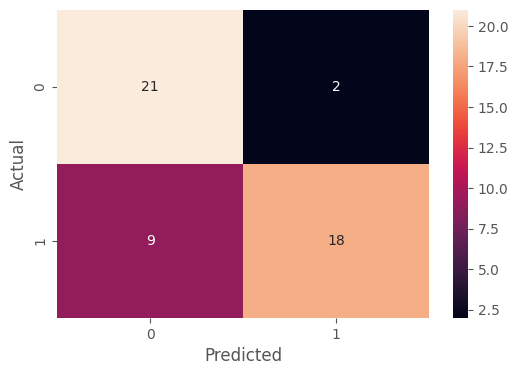

              precision    recall  f1-score   support

rock_español       0.69      0.87      0.77        23
 rock_ingles       0.86      0.67      0.75        27

    accuracy                           0.76        50
   macro avg       0.77      0.77      0.76        50
weighted avg       0.78      0.76      0.76        50



In [23]:
# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_predovrlbfgs)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test, y_predovrLinea))

In [24]:
predicciones = y_predovrLinea
df_predicciones = pd.DataFrame(data=predicciones, columns=['Genero sel'])
df_predicciones = pd.merge(df_predicciones, meta_test, left_index=True, right_index=True)
df_predicciones = df_predicciones.rename(columns={'categoria': 'Genero Original'})

df_predicciones.head()

Genero sel Genero Original                       Cancion  \
0   rock_ingles     rock_ingles                        Carrie   
1  rock_español    rock_español  El rompeolas - Remaster 2017   
2  rock_español     rock_ingles   20th Century Boy - Remaster   
3  rock_español    rock_español         Que se joda el viento   
4  rock_español     rock_ingles                 Seize the Day   

                      Artista  
0                      Europe  
1  Loquillo Y Los Trogloditas  
2                      T. Rex  
3                       Marea  
4           Avenged Sevenfold

In [25]:
df_diferentes = df_predicciones[df_predicciones['Genero sel'].ne(df_predicciones['Genero Original'])]
df_diferentes.head()

Genero sel Genero Original                      Cancion  \
2   rock_español     rock_ingles  20th Century Boy - Remaster   
4   rock_español     rock_ingles                Seize the Day   
7   rock_español     rock_ingles         Old Time Rock & Roll   
8   rock_español     rock_ingles   Rollin' (Air Raid Vehicle)   
10   rock_ingles    rock_español                En tu agujero   

              Artista  
2              T. Rex  
4   Avenged Sevenfold  
7           Bob Seger  
8         Limp Bizkit  
10              Marea

# 6.Analisis Muestras 2 Generos Random Forest Grid Search

## 6.1 Analisis datos

### Descripción Datos

In [26]:
file_names = ['rock_español.csv','rock_ingles.csv' ]
dataframes = []
for file in file_names:
    df = pd.read_csv(file)
    dataframes.append(df)

gen_ml = pd.concat(dataframes)

gen_ml.describe()


acousticness  danceability  duration_ms   energy  instrumentalness  \
count      400.0000      400.0000     400.0000 400.0000          400.0000   
mean         0.1290        0.5043  267701.4825   0.7558            0.0354   
std          0.1874        0.1269  108619.8903   0.1748            0.1122   
min          0.0000        0.1530   78427.0000   0.1790            0.0000   
25%          0.0063        0.4187  213899.7500   0.6565            0.0000   
50%          0.0390        0.5055  248711.0000   0.8100            0.0001   
75%          0.1812        0.5890  302223.2500   0.8900            0.0045   
max          0.9330        0.9330 1768080.0000   0.9980            0.8010   

           key  liveness  loudness     mode  speechiness    tempo  \
count 400.0000  400.0000  400.0000 400.0000     400.0000 400.0000   
mean    5.3300    0.1967   -6.3750   0.6575       0.0595 129.7497   
std     3.5316    0.1549    2.7038   0.4751       0.0483  30.4218   
min     0.0000    0.0200  -15.8820   0.0000       0.0235  64.1770   
25%     2.0000    0.0993   -8.0563   0.0000       0.0335 105.1188   
50%     5.0000    0.1370   -5.7570   1.0000       0.0412 127.6325   
75%     9.0000    0.2470   -4.3037   1.0000       0.0645 151.7640   
max    11.0000    0.9720   -1.8120   1.0000       0.4050 206.9030   

       time_signature  valence  
count        400.0000 400.0000  
mean           3.9350   0.5232  
std            0.3178   0.2181  
min            1.0000   0.0529  
25%            4.0000   0.3458  
50%            4.0000   0.5285  
75%            4.0000   0.6853  
max            5.0000   0.9820

In [27]:
gen_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 199
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cancion           400 non-null    object 
 1   Artista           400 non-null    object 
 2   categoria         400 non-null    object 
 3   acousticness      400 non-null    float64
 4   danceability      400 non-null    float64
 5   duration_ms       400 non-null    int64  
 6   energy            400 non-null    float64
 7   instrumentalness  400 non-null    float64
 8   key               400 non-null    int64  
 9   liveness          400 non-null    float64
 10  loudness          400 non-null    float64
 11  mode              400 non-null    int64  
 12  speechiness       400 non-null    float64
 13  tempo             400 non-null    float64
 14  time_signature    400 non-null    int64  
 15  valence           400 non-null    float64
dtypes: float64(9), int64(4), object(3)
memory us

In [28]:
gen_df = gen_ml.astype({'categoria': 'category'})

### Escalar Variables

In [29]:
#Se establecen las variables numéricas a escalar
numCols=gen_df.select_dtypes(include = ['float64','float64','int32','int64']).columns.tolist()
#Num_vars se le asigna la lista con las variables numerivas para posteriormente escalarlas
num_vars = numCols

print(num_vars)

['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']


In [30]:
#Escalar Variables númericas

pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
gen_df[num_vars] = scaler.fit_transform(gen_df[num_vars])
gen_df[num_vars] = scaler.fit_transform(gen_df[num_vars])

gen_df[num_vars].head()

acousticness  danceability  duration_ms  energy  instrumentalness    key  \
0        0.6677        0.5333       0.2594  0.3810            0.0268 0.4545   
1        0.4684        0.3205       0.0976  0.8718            0.0002 0.8182   
2        0.0420        0.3615       0.1203  0.8791            0.0006 0.3636   
3        0.0233        0.4115       0.0655  0.9231            0.0000 0.1818   
4        0.5445        0.3141       0.1904  0.7888            0.0000 0.6364   

   liveness  loudness   mode  speechiness  tempo  time_signature  valence  
0    0.0956    0.5225 1.0000       0.0566 0.4852          0.5000   0.1626  
1    0.0945    0.9344 0.0000       0.0626 0.5396          0.7500   0.5103  
2    0.0998    0.8559 0.0000       0.1104 0.6051          0.7500   0.3488  
3    0.0252    0.7765 1.0000       0.2241 0.6133          0.7500   0.9279  
4    0.2952    0.9183 1.0000       0.1064 0.4781          0.7500   0.2649

### Variable de salida

In [31]:
# Distriución de la variable de salida

gen_df.groupby('categoria').categoria.count().sort_values(ascending=False)

categoria
rock_español    200
rock_ingles     200
Name: categoria, dtype: int64

In [32]:
gen_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 199
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Cancion           400 non-null    object  
 1   Artista           400 non-null    object  
 2   categoria         400 non-null    category
 3   acousticness      400 non-null    float64 
 4   danceability      400 non-null    float64 
 5   duration_ms       400 non-null    float64 
 6   energy            400 non-null    float64 
 7   instrumentalness  400 non-null    float64 
 8   key               400 non-null    float64 
 9   liveness          400 non-null    float64 
 10  loudness          400 non-null    float64 
 11  mode              400 non-null    float64 
 12  speechiness       400 non-null    float64 
 13  tempo             400 non-null    float64 
 14  time_signature    400 non-null    float64 
 15  valence           400 non-null    float64 
dtypes: category(1), float64(13

### Dividir el conjunto de datos

In [33]:
df_prueba = gen_df.sample(n=50, random_state=123)

In [34]:
X = gen_df.drop(columns = ['categoria','Cancion','Artista'])
y = gen_df['categoria']

In [35]:
# Tus datos de prueba personalizados con un orden específico
X_test = df_prueba.drop(columns = ['categoria','Cancion','Artista'])
y_test = df_prueba['categoria']
meta_test = df_prueba[['categoria','Cancion','Artista']]
meta_test.reset_index(drop=True, inplace=True)


# Utiliza tus datos de prueba personalizados
X_test = np.array(X_test)  # Convierte tus datos a un arreglo NumPy si no lo están
y_test = np.array(y_test).reshape(-1, 1)  # Convierte tus etiquetas a una matriz de una columna si no lo están

# Verifica las formas de tus datos de prueba
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)


Forma de X_test: (50, 13)
Forma de y_test: (50, 1)


## 6.2 Creación Modelo

In [36]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [150],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20],
              'criterion'   : ['gini', 'entropy']
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = - 1,
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X, y)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

param_criterion param_max_depth param_max_features param_n_estimators  \
0             gini            None                  5                150   
2             gini            None                  9                150   
11            gini              20                  9                150   
9             gini              20                  5                150   

    mean_test_score  std_test_score  mean_train_score  std_train_score  
0            0.6950          0.0861            1.0000           0.0000  
2            0.6950          0.0650            1.0000           0.0000  
11           0.6950          0.0650            1.0000           0.0000  
9            0.6950          0.0861            1.0000           0.0000

In [37]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 150} : 0.695 accuracy


In [38]:
modelo_final = grid.best_estimator_

In [39]:
modelo_final

RandomForestClassifier(max_features=5, n_estimators=150, random_state=123)

## 6.3 Predicciones Modelo

In [40]:
y_pred = modelo_final.predict(X_test)

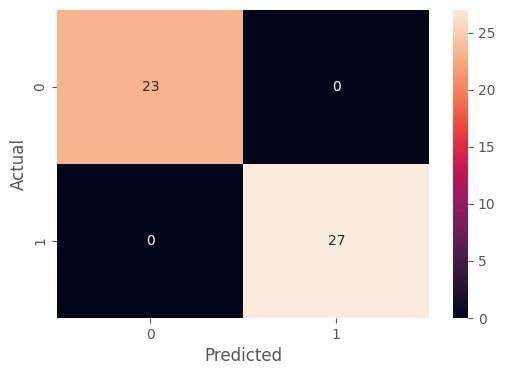

              precision    recall  f1-score   support

rock_español       1.00      1.00      1.00        23
 rock_ingles       1.00      1.00      1.00        27

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [41]:
# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test, y_pred))

In [46]:
predicciones = modelo_final.predict_proba(X = X_test)
df_predicciones = pd.DataFrame(data=predicciones, columns=['Español', 'Ingles'])
df_predicciones['clasificacion Genero'] = np.where(df_predicciones['Español'] > df_predicciones['Ingles'], 'rock_español', 'rock_ingles')
df_predicciones = pd.merge(df_predicciones, meta_test, left_index=True, right_index=True)
df_predicciones = df_predicciones.rename(columns={'categoria': 'Genero Original'})

df_predicciones.head(5)

Español  Ingles clasificacion Genero Genero Original  \
0   0.0467  0.9533          rock_ingles     rock_ingles   
1   0.8800  0.1200         rock_español    rock_español   
2   0.1933  0.8067          rock_ingles     rock_ingles   
3   0.9000  0.1000         rock_español    rock_español   
4   0.2000  0.8000          rock_ingles     rock_ingles   

                        Cancion                     Artista  
0                        Carrie                      Europe  
1  El rompeolas - Remaster 2017  Loquillo Y Los Trogloditas  
2   20th Century Boy - Remaster                      T. Rex  
3         Que se joda el viento                       Marea  
4                 Seize the Day           Avenged Sevenfold

In [47]:
df_diferentes = df_predicciones[df_predicciones['clasificacion Genero'].ne(df_predicciones['Genero Original'])]
df_diferentes.head()

Empty DataFrame
Columns: [Español, Ingles, clasificacion Genero, Genero Original, Cancion, Artista]
Index: []

# 7.Analisis 3 Generos

## 7.1 Analisis datos

### Descripción Datos

In [48]:
file_names = ['reggae_roots.csv','reggaeton.csv','R&B.csv' ]
dataframes = []
for file in file_names:
    df = pd.read_csv(file)
    dataframes.append(df)

gen_ml = pd.concat(dataframes)

gen_ml.describe()


acousticness  danceability  duration_ms   energy  instrumentalness  \
count      600.0000      600.0000     600.0000 600.0000          600.0000   
mean         0.1557        0.7539  233212.8933   0.6250            0.0371   
std          0.1699        0.1097   53044.0426   0.1649            0.1549   
min          0.0000        0.3280  109302.0000   0.1320            0.0000   
25%          0.0292        0.6967  201132.5000   0.4988            0.0000   
50%          0.0963        0.7700  222373.5000   0.6340            0.0000   
75%          0.2288        0.8322  249623.5000   0.7472            0.0002   
max          0.9290        0.9500  483373.0000   0.9890            0.9080   

           key  liveness  loudness     mode  speechiness    tempo  \
count 600.0000  600.0000  600.0000 600.0000     600.0000 600.0000   
mean    5.5033    0.1556   -6.8738   0.5317       0.1494 122.3248   
std     3.6900    0.1267    3.1435   0.4994       0.1104  32.1017   
min     0.0000    0.0256  -17.4170   0.0000       0.0269  65.6070   
25%     2.0000    0.0802   -8.5672   0.0000       0.0628  94.9745   
50%     6.0000    0.1090   -6.3300   1.0000       0.1070 122.4935   
75%     9.0000    0.1822   -4.4417   1.0000       0.2075 144.1070   
max    11.0000    0.8240   -0.7390   1.0000       0.6800 203.6810   

       time_signature  valence  
count        600.0000 600.0000  
mean           4.0017   0.6426  
std            0.2043   0.2137  
min            3.0000   0.0393  
25%            4.0000   0.5038  
50%            4.0000   0.6785  
75%            4.0000   0.8120  
max            5.0000   0.9730

In [49]:
gen_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 199
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cancion           600 non-null    object 
 1   Artista           600 non-null    object 
 2   categoria         600 non-null    object 
 3   acousticness      600 non-null    float64
 4   danceability      600 non-null    float64
 5   duration_ms       600 non-null    int64  
 6   energy            600 non-null    float64
 7   instrumentalness  600 non-null    float64
 8   key               600 non-null    int64  
 9   liveness          600 non-null    float64
 10  loudness          600 non-null    float64
 11  mode              600 non-null    int64  
 12  speechiness       600 non-null    float64
 13  tempo             600 non-null    float64
 14  time_signature    600 non-null    int64  
 15  valence           600 non-null    float64
dtypes: float64(9), int64(4), object(3)
memory us

In [50]:
gen_df = gen_ml.astype({'categoria': 'category'})

### Escalar Variables

In [51]:
#Se establecen las variables numéricas a escalar
numCols=gen_df.select_dtypes(include = ['float64','float64','int32','int64']).columns.tolist()
#Num_vars se le asigna la lista con las variables numerivas para posteriormente escalarlas
num_vars = numCols

print(num_vars)

['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']


In [52]:
#Escalar Variables númericas

pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
gen_df[num_vars] = scaler.fit_transform(gen_df[num_vars])
gen_df[num_vars] = scaler.fit_transform(gen_df[num_vars])

gen_df[num_vars].head()

acousticness  danceability  duration_ms  energy  instrumentalness    key  \
0        0.1119        0.6463       0.6856  0.5274            0.0447 0.5455   
1        0.0934        0.6640       0.5469  0.5426            0.0000 0.6364   
2        0.1819        0.7363       0.3640  0.3746            0.0025 0.0000   
3        0.0339        0.6897       0.3627  0.4166            0.0001 0.3636   
4        0.0330        0.6720       0.6402  0.4061            0.0000 0.0909   

   liveness  loudness   mode  speechiness  tempo  time_signature  valence  
0    0.4026    0.5012 0.0000       0.0851 0.5680          0.5000   0.8329  
1    0.1032    0.7034 0.0000       0.0372 0.5069          0.5000   0.7815  
2    0.0607    0.5290 1.0000       0.1109 0.6015          0.5000   0.6059  
3    0.0969    0.4644 0.0000       0.0550 0.5130          0.5000   0.8201  
4    0.0817    0.8422 1.0000       0.0412 0.5894          0.5000   0.7183

### Variable de salida

In [53]:
# Distriución de la variable de salida

gen_df.groupby('categoria').categoria.count().sort_values(ascending=False)

categoria
R&B             200
reggae_roots    200
reggaeton       200
Name: categoria, dtype: int64

In [54]:
gen_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 199
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Cancion           600 non-null    object  
 1   Artista           600 non-null    object  
 2   categoria         600 non-null    category
 3   acousticness      600 non-null    float64 
 4   danceability      600 non-null    float64 
 5   duration_ms       600 non-null    float64 
 6   energy            600 non-null    float64 
 7   instrumentalness  600 non-null    float64 
 8   key               600 non-null    float64 
 9   liveness          600 non-null    float64 
 10  loudness          600 non-null    float64 
 11  mode              600 non-null    float64 
 12  speechiness       600 non-null    float64 
 13  tempo             600 non-null    float64 
 14  time_signature    600 non-null    float64 
 15  valence           600 non-null    float64 
dtypes: category(1), float64(13

### Dividir el conjunto de datos

In [55]:
df_prueba = gen_df.sample(n=300, random_state=123)

In [56]:
X = gen_df.drop(columns = ['categoria','Cancion','Artista'])
y = gen_df['categoria']

In [57]:
# Tus datos de prueba personalizados con un orden específico
X_test = df_prueba.drop(columns = ['categoria','Cancion','Artista'])
y_test = df_prueba['categoria']
meta_test = df_prueba[['categoria','Cancion','Artista']]
meta_test.reset_index(drop=True, inplace=True)


# Utiliza tus datos de prueba personalizados
X_test = np.array(X_test)  # Convierte tus datos a un arreglo NumPy si no lo están
y_test = np.array(y_test).reshape(-1, 1)  # Convierte tus etiquetas a una matriz de una columna si no lo están

# Verifica las formas de tus datos de prueba
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)


Forma de X_test: (300, 13)
Forma de y_test: (300, 1)


## 7.2 Creación modelo

In [58]:
#Creación del modelo

modelLRovrLinea       = LogisticRegression(multi_class = "ovr", solver='liblinear',  random_state=0, penalty='l1') #smaller dataset
modelLRovrlbfgs       = LogisticRegression(multi_class = "ovr", solver='lbfgs',  random_state=0)
modelLRMullbfgs       = LogisticRegression(multi_class = "multinomial", solver='lbfgs',  random_state=0)


#Entrenamiento del modelo con 80% de training

modelLRovrLinea.fit(X, y)
modelLRovrlbfgs.fit(X, y)
modelLRMullbfgs.fit(X, y)


LogisticRegression(multi_class='multinomial', random_state=0)

In [59]:
# Se realiza la predicción de cada uno de los modelos creados utilizando los datos prueba
y_predovrLinea = modelLRovrLinea.predict(X_test)
y_predovrlbfgs = modelLRovrlbfgs.predict(X_test)
y_predMullbfgs = modelLRMullbfgs.predict(X_test)

In [60]:
# Se imprimen las métricas de exactitud de los modelos a partir de los datos de prueba

print("="*5 + f" Accuracy Logistic Regression " + "="*20)
print()
print("ovr - Linear       :",metrics.accuracy_score(y_test, y_predovrLinea))
print("ovr - lbfgs        :",metrics.accuracy_score(y_test, y_predovrlbfgs))
print("multinomial - lbfgs:",metrics.accuracy_score(y_test, y_predMullbfgs))


===== Accuracy Logistic Regression ====================

ovr - Linear       : 0.7566666666666667
ovr - lbfgs        : 0.7566666666666667
multinomial - lbfgs: 0.75


##7.3 Predicciones Modelo

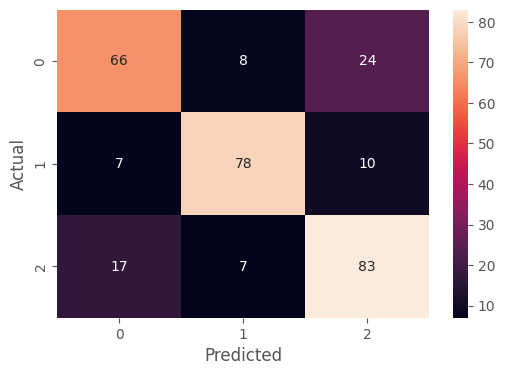

              precision    recall  f1-score   support

         R&B       0.73      0.67      0.70        98
reggae_roots       0.84      0.82      0.83        95
   reggaeton       0.71      0.78      0.74       107

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



In [61]:
# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_predovrLinea)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test, y_predovrLinea))

In [62]:
predicciones = y_predovrLinea
df_predicciones = pd.DataFrame(data=predicciones, columns=['Genero sel'])
df_predicciones = pd.merge(df_predicciones, meta_test, left_index=True, right_index=True)
df_predicciones = df_predicciones.rename(columns={'categoria': 'Genero Original'})

df_predicciones.head()

Genero sel Genero Original             Cancion   Artista
0     reggaeton       reggaeton                Bobo  J Balvin
1  reggae_roots    reggae_roots  In the Race So Far   Midnite
2           R&B             R&B                4422     Drake
3     reggaeton       reggaeton       Ay, DiOs Mío!   KAROL G
4           R&B             R&B           One Dance     Drake

In [64]:
df_diferentes = df_predicciones[df_predicciones['Genero sel'].ne(df_predicciones['Genero Original'])]
df_diferentes.head(20)

Genero sel Genero Original                          Cancion  \
6      reggaeton             R&B                           Mirror   
9      reggaeton             R&B                     Boys & Girls   
10  reggae_roots             R&B      Broccoli (feat. Lil Yachty)   
13           R&B    reggae_roots                   Stand the Test   
15     reggaeton             R&B                     Forrest Gump   
17     reggaeton             R&B                            Rolex   
18     reggaeton             R&B                       goosebumps   
29     reggaeton    reggae_roots                            Money   
38           R&B       reggaeton            Bebe (feat. Anuel AA)   
43     reggaeton             R&B      Know My Ting (feat. Shakka)   
44  reggae_roots             R&B                      Did You See   
46     reggaeton    reggae_roots       Animal - Mark Ronson Remix   
48     reggaeton             R&B              Hold You - Hold Yuh   
53           R&B       reggaeton                            Hawái   
54           R&B       reggaeton                            11 PM   
60  reggae_roots             R&B                     Passionfruit   
64     reggaeton             R&B                    Nice For What   
69           R&B       reggaeton                           Hey DJ   
84  reggae_roots       reggaeton                         Maldade$   
91     reggaeton    reggae_roots  Rasta Love Feat. Ky-Mani Marley   

         Artista  
6      Lil Wayne  
9      will.i.am  
10          DRAM  
13       Midnite  
15         Loski  
17     Ayo & Teo  
18  Travis Scott  
29     Alborosie  
38         Ozuna  
43        Ghetts  
44         J Hus  
46    Miike Snow  
48       Gyptian  
53        Maluma  
54        Maluma  
60         Drake  
64         Drake  
69          CNCO  
84         Cazzu  
91       Protoje